# $$ PYTHON 第三课$$

 课表：
     - mysql数据库基本操作
     - 用python操作数据库
     - 编写python爬虫并保存到数据库


### 数据库

## mysql数据库
    非关系性数据库
    MariaDB:兼容Mysql，包括API和命令行，能代替Mysql

##### 关系型数据库
$eg：$ Mongodb，redis

In [ ]:
dict = {
    'a':100,
    'b':200
}

In [6]:
import json
# 用json.load()时文件的json格式中str最好为双引号
with open('data.json','r') as f:
   json.load(f)

#### mysql基本操作

In [ ]:
# 连接数据库
mysql -u root -p
# 查看所有数据库
show databases
# 选择数据库
use face_bd
# 查看数据库中的table
show tables
# 查看表格的结构
desc tables

### 使用python去操作数据库

In [52]:
import pymysql
DATABASE = {
    "host" : "127.0.0.1",
    "database" : "face_bd",
    "user" : "root",
    "password" : "root",
    "charset" : "utf8"# 防止乱码
}
#db = pymysql.connect('localhost','root','root','face_bd','utf8')
# 等价与
db = pymysql.connect(**DATABASE)

In [53]:
# 游标
cursor = db.cursor()

In [54]:
sql = "select * from t_user"
cursor.execute(sql)
db.commit()
result = cursor.fetchall() 
for re in result:
    print(re)


(1, None, None, '张三', '/xxx.img', '17393746284', '8', 0, 1, 1, '513622345836295701', '\t2018-10-25 18:56:13')
(2, None, None, '李四', '/', '18902349908', '8', 0, 1, 2, '7328987429743892', '2018-12-02 11：00')


In [56]:
# 执行出错就回滚
try:
    # 查询
    sql = "select * from t_user"
    # 提交
    db.commit()
    # 查询结果
    result = cursor.fetchall() 
    for re in result:
        print(re)
except Exception as e:
    print(e)
    db.rollback()


(1146, "Table 'face_bd.t_usr' doesn't exist")


# $$爬虫$$

#### python库
    1.requests 获取页面内容
    2.BeautifulSoop

In [8]:
import requests
from bs4 import BeautifulSoup

url = "https://bj.lianjia.com/zufang/"
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'}
# requests.head(url)
reponse = requests.get(url)
reponse

<Response [403]>

<!DOCTYPE html>
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no-transform" http-equiv="Cache-Control"/>
<meta content="no-siteapp" http-equiv="Cache-Control"/>
<meta content="zh-CN" http-equiv="Content-language"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="pc" name="applicable-device"/>
<meta content="贝壳北京租房网,提供真实的北京租房信息、出租房源信息、租房价格,包括北京整租、合租、公寓出租等信息,以及北京房屋出租个人信息、经纪人信息、品牌公寓信息等.找租房房源,就来北京贝壳租房!" name="description"/>
<meta content="北京租房信息,北京出租房网,北京房屋出租价格" name="keywords"/>
<meta content="no-transform " http-equiv="Cache-Control"/>
<title>北京租房信息_北京出租房源|房屋出租价格【北京贝壳租房】</title>
<link href="https://s1.ljcdn.com/matrix_lianjia_pc/dist/pc/src/resource/img/favicon.ico?_v=2019011420003735b" rel="icon" type="image/x-icon"/>
<link href="https://s1.ljcdn.com/matrix_lianjia_pc/dist/pc/src/common/css/common.css?_v=2019011420003735b" rel="stylesheet"/>
<script>
    var g
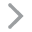

In [88]:
from urllib.request import urlopen
from urllib import request
# 1 --- urlopen(req).read().decode('utf-8') 
url = "https://bj.lianjia.com/zufang/"
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'}
req = request.Request(url, headers=headers)
#print(urlopen(req).read().decode('utf-8'))
#格式化
soup = BeautifulSoup(urlopen(req),'lxml')
soup

In [80]:
#links_div = soup.find_all('a',attrs={'class':'content__list--item--aside'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               )

# links = ['https//:bj.lianjia.com'+div.get('href') for div in links_div]
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib import error
def get_page(url):
    '''
    desc -- 获取url页面内容，返回soup对象
    '''
#     headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'}
#     req = request.Request(url, headers=headers)
    try:
        req = urlopen(url)
        if req.getcode()==200:
            print(req.getcode())
            soup = BeautifulSoup(req,'lxml')
        else:
            soup == None
    #     soup = BeautifulSoup(urlopen(req).read().decode('utf-8'),'lxml')
    except error.URLError as e:
        if hasattr(e,'code'):
            print("HTTPError")
            print(e.code)
        elif hasattr(e,'reason'):
            print("URLError")
            print(e.reason)
    except ValueError as e:
        return 0
    return soup

# 2 --- soup = BeautifulSoup(urlopen(url),'lxml')
def get_links(link_url):
    '''
    desc -- 获取列表页面下面的所有租房连接列表
    '''
    soup = get_page(link_url)
    if soup ==0:return 0
    links_div = soup.find_all('a',attrs={'class':'content__list--item--aside'})
    links = ['https://bj.lianjia.com'+div.get('href') for div in links_div]
    return links




def get_house_info(house_info_url):
    
    soup = get_page(house_info_url)
    if soup == 0:return
    # price = soup.find('p',attrs={'class':'content__aside--title'}).find('span').get_text()
    price = soup.find('p',attrs={'class':'content__aside--title'}).get_text()

    house_info = soup.find('p',attrs={'class':'content__article__table'}).find_all('span')
    #房屋基本信息
    house_info2 =soup.find('div',attrs={'class':'content__article__info'}).find_all('li')
    #配套设备息
    #house_info3 =soup.find('div',attrs={'class':'content__article__info2'}).find_all('li')
    # 房源描述
    
    house_info4 =soup.find('div',attrs={'class':'content__article__info3'}
                          ).find('p',attrs={'data-el':'houseComment'})
    if house_info4 == None:
        subway = None
        community = None
    else:
        house_info4 = house_info4.get_text()
        subway = house_info4.strip().split('\n')[0].split(" ")[1]
        community = house_info4.strip().split('\n')[-1].split(" ")[-1]
    # 地址和交通
    house_info5 = soup.find('div',attrs={'class':'content__article__info4'}
                           ).find_all('li')
    location_info = soup.find('div',attrs={'class':'bottom__list'}
                           ).find('span').get_text().strip().split('\n')
    location = ''.join([x.strip(' ') for x in location_info])
    area = house_info[2].get_text()
    floor = house_info2[7].get_text()[3:]
    layout =house_info[1].get_text() + ' ' + house_info[0].get_text()
    create_time = house_info2[1].get_text()[3:]
    direction =  house_info[-1].get_text()
   
    # location = [(x.get_text().strip().strip('\n')) for x in house_info5]
    agent = soup.find('div',attrs={'class':'desc'}
                     ).find('a',attrs={'class':'name'}).get_text()
    agent_phone = soup.find('div',attrs={'class':'desc'}
                     ).find('div',attrs={'class':'phone'}).get_text()
    info = {
        '价格':price,
        '户型':layout,
        '面积':area,
        '楼层':floor,
        '朝向':direction,
        '地铁':subway,
        '小区':community,
        '位置':location,
        '发布日期':create_time,
        '经纪人名称':agent,
        '经纪人电话':agent_phone
    }
    return info
# value = [x.split(" ")[1] for x in house_info4.strip().split('\n')]
# key = [x.split(" ")[0] for x in house_info4.strip().split('\n')]

# info = zip(key,value)
# dict(info)


In [81]:
# house_url = "https://bj.lianjia.com/zufang/BJ2136201110581411840.html?nav=0"
# get_house_info(house_url)

In [91]:
import pymysql
DATABASE = {
    "host" : "127.0.0.1",
    "database" : "Examination",
    "user" : "root",
    "password" : "root",
    "charset" : "utf8"# 防止乱码
}
def get_db(setting):
    return pymysql.connect(**setting)

def insert(db,house_info):
    values = "'{}',"*10+"'{}'"
    sql_values = values.format(house_info['价格'],house_info['户型'],house_info['面积'],
                              house_info['楼层'],house_info['朝向'],house_info['地铁'],
                              house_info['小区'],house_info['位置'],house_info['发布日期'],
                              house_info['经纪人名称'],house_info['经纪人电话'])
    sql = """
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values({})
    """.format(sql_values)
    print(sql,'----sql')
    cursor = db.cursor()
    re = cursor.execute(sql)
    print(re,'-------------result----------')
    db.commit()

In [92]:
# house = get_house_info('https//:bj.lianjia.com/zufang/BJ2136201110581411840.html')

# house

In [93]:
# links = get_links(url)
# house = get_house_info(links[1])
# print(links)
# house

In [85]:
# print(type(links[1]))

In [95]:
import time
db = get_db(DATABASE)
for x in range(2,101):
    
    url = "https://bj.lianjia.com/zufang/"+"pg"+str(x)+"/"
    links = get_links(url)
    for link in links:
        time.sleep(2)
        if link == 0:
            continue
        print(link,'====link')
        house = get_house_info(link)
        print(house,end='\r')
        if house == None:
            continue
        insert(db,house)

200
https://bj.lianjia.com/zufang/BJ2142609885357932544.html ====link
200
{'价格': '5500元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '48㎡', '楼层': '高楼层/18层', '朝向': '朝南', '地铁': None, '小区': None, '位置': '西城-马甸双旗杆东里', '发布日期': '1个月前', '经纪人名称': '李凯', '经纪人电话': '4000131921转8864'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5500元/月 (季付价)','1室1厅1卫 整租','48㎡','高楼层/18层','朝南','None','None','西城-马甸双旗杆东里','1个月前','李凯','4000131921转8864')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2142661674593681408.html ====link
200
{'价格': '5500元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '46㎡', '楼层': '低楼层/6层', '朝向': '朝南', '地铁': None, '小区': None, '位置': '朝阳-红庙延静里中街', '发布日期': '1个月前', '经纪人名称': '毕天宇', '经纪人电话': '4000191265转2094'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        v

https://bj.lianjia.com/zufang/BJ2145027850359537664.html ====link
200
{'价格': '7200元/月 (半年付价)', '户型': '2室0厅1卫 整租', '面积': '45㎡', '楼层': '低楼层/11层', '朝向': '朝南 北', '地铁': '宣武门外东大街户型比较好的两居室，一南一北两个卧室，两个卧室面积都比较大，居住方便。', '小区': '餐饮：越秀大饭店、和平门烤鸭店、晋阳饭庄、丰泽园', '位置': '西城-宣武门宣武门外东大街', '发布日期': '1个月前', '经纪人名称': '贾志强', '经纪人电话': '4000124028转4104'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('7200元/月 (半年付价)','2室0厅1卫 整租','45㎡','低楼层/11层','朝南 北','宣武门外东大街户型比较好的两居室，一南一北两个卧室，两个卧室面积都比较大，居住方便。','餐饮：越秀大饭店、和平门烤鸭店、晋阳饭庄、丰泽园','西城-宣武门宣武门外东大街','1个月前','贾志强','4000124028转4104')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2145341085184950272.html ====link
200
{'价格': '8000元/月 (季付价)', '户型': '3室1厅2卫 整租', '面积': '76㎡', '楼层': '低楼层/18层', '朝向': '朝东 西', '地铁': '小区出北门步行300米就是地铁白石桥南站，公交站步行300米是白石桥南站，开车1.5公里上三环，交通便利，方便您的出行。', '小区': '小区步行200米有果多美超市、呷哺呷哺还有拉面馆。银行步行300米有中国银行、平安银行、北京银行和邮政储蓄等。

https://bj.lianjia.com/zufang/BJ2146930692251197440.html ====link
200
{'价格': '8000元/月 ', '户型': '2室1厅2卫 租赁方式未知', '面积': '125㎡', '楼层': '中楼层/5层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '丰台-草桥夏季星空', '发布日期': '1个月前', '经纪人名称': '杨志达', '经纪人电话': '4000131921转2811'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('8000元/月 ','2室1厅2卫 租赁方式未知','125㎡','中楼层/5层','朝南 北','None','None','丰台-草桥夏季星空','1个月前','杨志达','4000131921转2811')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2147137861081120768.html ====link
200
{'价格': '7700元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '66㎡', '楼层': '中楼层/13层', '朝向': '朝南 北', '地铁': '本房位于中间楼层，楼前无遮挡，朝南卧室带阳台，采光好，中间是客厅，小卧室朝北；', '小区': '此房所在位置繁华，有物美超市，双秀公园、人定湖公园，建设银行、工商银行等；', '位置': '西城-马甸马甸南村', '发布日期': '1个月前', '经纪人名称': '孙悦波', '经纪人电话': '4000131921转8925'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway

https://bj.lianjia.com/zufang/BJ2149175725595295744.html ====link
200
{'价格': '5500元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '45㎡', '楼层': '中楼层/18层', '朝向': '朝西北 北', '地铁': '小区附近有公共交通和地铁，公交站劲松南路站、华为西里站、潘家园桥北站；公交线路有674.378.36.51.34.36.等，地铁是10号地铁劲松站，距离550米，数据来源百度地图；', '小区': '小区位于潘家园桥西北角，建成年代1988-2007年之间。有板楼、塔楼、高板三种建筑方式，社区成熟。', '位置': '朝阳-潘家园华威北里', '发布日期': '1个月前', '经纪人名称': '吕亚飞', '经纪人电话': '4000051367转0819'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5500元/月 (季付价)','2室1厅1卫 整租','45㎡','中楼层/18层','朝西北 北','小区附近有公共交通和地铁，公交站劲松南路站、华为西里站、潘家园桥北站；公交线路有674.378.36.51.34.36.等，地铁是10号地铁劲松站，距离550米，数据来源百度地图；','小区位于潘家园桥西北角，建成年代1988-2007年之间。有板楼、塔楼、高板三种建筑方式，社区成熟。','朝阳-潘家园华威北里','1个月前','吕亚飞','4000051367转0819')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2149258825058746368.html ====link
200
{'价格': '6200元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '58㎡', '楼层': '高楼层/18层', '朝向'

200
{'价格': '5500元/月 (季付价)', '户型': '2室1厅1卫 租赁方式未知', '面积': '58㎡', '楼层': '高楼层/16层', '朝向': '朝西南', '地铁': '房子是无遮挡的西向两居室，塔楼高楼层视野开阔，全明格局通风性好，小区安静而且车位充裕。经典户型，主卧有一个大阳台，可充分享受冬日的暖阳。', '小区': '超市：物美超市、家乐福超市', '位置': '海淀-牡丹园都景苑', '发布日期': '1个月前', '经纪人名称': '王凯强', '经纪人电话': '4000192115转6052'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5500元/月 (季付价)','2室1厅1卫 租赁方式未知','58㎡','高楼层/16层','朝西南','房子是无遮挡的西向两居室，塔楼高楼层视野开阔，全明格局通风性好，小区安静而且车位充裕。经典户型，主卧有一个大阳台，可充分享受冬日的暖阳。','超市：物美超市、家乐福超市','海淀-牡丹园都景苑','1个月前','王凯强','4000192115转6052')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2150653211307155456.html ====link
200
{'价格': '6500元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '85㎡', '楼层': '高楼层/16层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '朝阳-常营北辰福第二号院', '发布日期': '29天前', '经纪人名称': '张锁成', '经纪人电话': '4000192115转8601'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`dire

https://bj.lianjia.com/zufang/BJ2152030661551603712.html ====link
200
{'价格': '8000元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '57㎡', '楼层': '低楼层/6层', '朝向': '朝东 西', '地铁': None, '小区': None, '位置': '西城-月坛阜成门外大街', '发布日期': '27天前', '经纪人名称': '刘冬雪', '经纪人电话': '4000124028转4125'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('8000元/月 (季付价)','2室1厅1卫 整租','57㎡','低楼层/6层','朝东 西','None','None','西城-月坛阜成门外大街','27天前','刘冬雪','4000124028转4125')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2152047860043227136.html ====link
200
{'价格': '5600元/月 (季付价)', '户型': '1室0厅1卫 整租', '面积': '51㎡', '楼层': '低楼层/32层', '朝向': '朝东北', '地铁': '此房为东北向开间，有独立厨房，这个户型在本小区就这一栋楼里有，', '小区': '此房为2008年奥运会项目的房子，称为媒体村，当时奥运会居住的房子，房子本身质量还是没有问题的，小区人车分流，中间有环形跑道，平时散步跑步也很方便。', '位置': '朝阳-奥林匹克公园天居园', '发布日期': '27天前', '经纪人名称': '田长鑫', '经纪人电话': '4008896913转0534'}
        insert into `house` (`price`,`layout`,`area`,`

https://bj.lianjia.com/zufang/BJ2153572667871985664.html ====link
200
{'价格': '9200元/月 ', '户型': '3室1厅1卫 租赁方式未知', '面积': '76㎡', '楼层': '高楼层/6层', '朝向': '朝东 西', '地铁': None, '小区': None, '位置': '西城-长椿街思源胡同', '发布日期': '25天前', '经纪人名称': '陈健', '经纪人电话': '4000124028转6228'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('9200元/月 ','3室1厅1卫 租赁方式未知','76㎡','高楼层/6层','朝东 西','None','None','西城-长椿街思源胡同','25天前','陈健','4000124028转6228')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2153595882665689088.html ====link
200
{'价格': '7500元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '58㎡', '楼层': '高楼层/6层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '东城-东花市东花市北里中区', '发布日期': '25天前', '经纪人名称': '郝志涛', '经纪人电话': '4000124028转6134'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        v

https://bj.lianjia.com/zufang/BJ2155594914677653504.html ====link
200
{'价格': '6500元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '67㎡', '楼层': '低楼层/18层', '朝向': '朝西南', '地铁': '1.', '小区': '周边配套设施齐全，有广外医院和电力医院，三义里幼儿园，家乐福超市，百安居，马连道茶城，新年华购物商城，成龙影城，华联商厦，红莲商场。附近银行比较多，交通银行，邮政银行，建筑银行。农业银行，电信和联通，移动营业厅较多。', '位置': '西城-马连道马连道中里', '发布日期': '23天前', '经纪人名称': '衣丽华', '经纪人电话': '4000192115转5797'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6500元/月 (季付价)','2室1厅1卫 整租','67㎡','低楼层/18层','朝西南','1.','周边配套设施齐全，有广外医院和电力医院，三义里幼儿园，家乐福超市，百安居，马连道茶城，新年华购物商城，成龙影城，华联商厦，红莲商场。附近银行比较多，交通银行，邮政银行，建筑银行。农业银行，电信和联通，移动营业厅较多。','西城-马连道马连道中里','23天前','衣丽华','4000192115转5797')
     ----sql
1 -------------result----------
200
https://bj.lianjia.com/zufang/BJ2155678202893713408.html ====link
200
{'价格': '6000元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '57㎡', '楼层': '低楼层/6层', '朝向': '朝东 西', '地铁': None, '小区': None, '位置': '西城-陶然亭四平园', '发布日期':

200
{'价格': '6800元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '67㎡', '楼层': '高楼层/14层', '朝向': '朝南 西 北', '地铁': None, '小区': None, '位置': '西城-陶然亭畅柳园', '发布日期': '21天前', '经纪人名称': '吴凡', '经纪人电话': '4000134576转9438'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6800元/月 ','2室1厅1卫 租赁方式未知','67㎡','高楼层/14层','朝南 西 北','None','None','西城-陶然亭畅柳园','21天前','吴凡','4000134576转9438')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2157096431797157888.html ====link
200
{'价格': '5600元/月 (季付价)', '户型': '1室0厅1卫 整租', '面积': '46㎡', '楼层': '中楼层/15层', '朝向': '朝东', '地铁': None, '小区': None, '位置': '东城-广渠门北京上舍', '发布日期': '20天前', '经纪人名称': '陈凯', '经纪人电话': '4000191265转1627'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5600元/月 (季付价)','1室0厅1卫 整租','46㎡','中楼层/15层','朝东','None','Non

https://bj.lianjia.com/zufang/BJ2158415693220159488.html ====link
200
{'价格': '5700元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '46㎡', '楼层': '中楼层/6层', '朝向': '朝南 北', '地铁': '本房楼层属于中楼层，南北通透，无遮挡采光好，视野比较开阔，进门左边是一个大卧室，带一朝南大阳台，中间是客厅，右边是开放式的厨房和卫生间，各带一朝北的窗户，与朝南的卧室形成很自然的通风，便于空气的正常流通。', '小区': '小区位于盘古大观西侧，附近周边有中国银行，交通银行，西边有一个大型的菜市场，金客隆超市，四喜通超市，华联超市是生活用品比较丰富，嘉州烤鸭店，美食繁多。', '位置': '朝阳-健翔桥社会科学院', '发布日期': '19天前', '经纪人名称': '程飞', '经纪人电话': '4000191265转2022'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5700元/月 (季付价)','1室1厅1卫 整租','46㎡','中楼层/6层','朝南 北','本房楼层属于中楼层，南北通透，无遮挡采光好，视野比较开阔，进门左边是一个大卧室，带一朝南大阳台，中间是客厅，右边是开放式的厨房和卫生间，各带一朝北的窗户，与朝南的卧室形成很自然的通风，便于空气的正常流通。','小区位于盘古大观西侧，附近周边有中国银行，交通银行，西边有一个大型的菜市场，金客隆超市，四喜通超市，华联超市是生活用品比较丰富，嘉州烤鸭店，美食繁多。','朝阳-健翔桥社会科学院','19天前','程飞','4000191265转2022')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2158448227882909696.html ====link
200
{'价格': 

{'价格': '5500元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '37㎡', '楼层': '中楼层/5层', '朝向': '朝东', '地铁': None, '小区': None, '位置': '东城-和平里化工大院', '发布日期': '18天前', '经纪人名称': '刘志朋', '经纪人电话': '4000191265转1573'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5500元/月 (季付价)','1室1厅1卫 整租','37㎡','中楼层/5层','朝东','None','None','东城-和平里化工大院','18天前','刘志朋','4000191265转1573')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2159220150342262784.html ====link
200
{'价格': '12000元/月 ', '户型': '2室2厅1卫 租赁方式未知', '面积': '105㎡', '楼层': '中楼层/18层', '朝向': '朝东', '地铁': None, '小区': None, '位置': '西城-陶然亭陶然北岸', '发布日期': '18天前', '经纪人名称': '吴凡', '经纪人电话': '4000124028转6164'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('12000元/月 ','2室2厅1卫 租赁方式未知','105㎡','中楼层/18层','朝东','None','None','西城

200
{'价格': '7000元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '66㎡', '楼层': '高楼层/12层', '朝向': '朝南 北', '地铁': '房子是带电梯的南向两居室，', '小区': '此房所在位置生活便利，家乐福，大润发，奥体中心，元大都遗址公园。', '位置': '朝阳-健翔桥华严北里中科院', '发布日期': '17天前', '经纪人名称': '韩康', '经纪人电话': '4000169832转5790'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('7000元/月 (季付价)','2室1厅1卫 整租','66㎡','高楼层/12层','朝南 北','房子是带电梯的南向两居室，','此房所在位置生活便利，家乐福，大润发，奥体中心，元大都遗址公园。','朝阳-健翔桥华严北里中科院','17天前','韩康','4000169832转5790')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2159987558539329536.html ====link
200
{'价格': '6300元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '62㎡', '楼层': '高楼层/7层', '朝向': '朝南', '地铁': None, '小区': None, '位置': '朝阳-安贞安贞里', '发布日期': '17天前', '经纪人名称': '刘峰', '经纪人电话': '4000134576转3517'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phon

200
https://bj.lianjia.com/zufang/BJ2160878355585433600.html ====link
200
{'价格': '3500元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '63㎡', '楼层': '高楼层/6层', '朝向': '朝东 南', '地铁': None, '小区': None, '位置': '昌平-东关东关北里小区', '发布日期': '15天前', '经纪人名称': '周玥', '经纪人电话': '4000131283转6763'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('3500元/月 ','2室1厅1卫 租赁方式未知','63㎡','高楼层/6层','朝东 南','None','None','昌平-东关东关北里小区','15天前','周玥','4000131283转6763')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2160883407440052224.html ====link
200
{'价格': '8300元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '44㎡', '楼层': '高楼层/19层', '朝向': '朝东', '地铁': None, '小区': None, '位置': '西城-金融街民康胡同30号院', '发布日期': '15天前', '经纪人名称': '高莹莹', '经纪人电话': '4000124028转6048'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
  

https://bj.lianjia.com/zufang/BJ2161593575081508864.html ====link
200
{'价格': '6900元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '97㎡', '楼层': '低楼层/6层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '昌平-回龙观龙跃苑东五区', '发布日期': '14天前', '经纪人名称': '关枫', '经纪人电话': '4000124028转1224'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6900元/月 ','2室1厅1卫 租赁方式未知','97㎡','低楼层/6层','朝南 北','None','None','昌平-回龙观龙跃苑东五区','14天前','关枫','4000124028转1224')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2161980948214710272.html ====link
200
{'价格': '7000元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '97㎡', '楼层': '低楼层/6层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '昌平-回龙观龙腾苑三区', '发布日期': '14天前', '经纪人名称': '田思', '经纪人电话': '4000124028转1220'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
       

https://bj.lianjia.com/zufang/BJ2162319967523962880.html ====link
200
{'价格': '8500元/月 (季付价)', '户型': '3室1厅2卫 整租', '面积': '124㎡', '楼层': '中楼层/6层', '朝向': '朝南 北', '地铁': '❤❤精装三居，全新的家具家电，板楼3层，看房随时，第一次出租，2018年年初的装修', '小区': '❤❤房子2018年年初装修的，近期打算入住，由于长辈原因，业主不方便自己回来住，所以只能对外出租。', '位置': '昌平-回龙观和谐家园二区', '发布日期': '13天前', '经纪人名称': '李晓燕', '经纪人电话': '4000169832转6887'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('8500元/月 (季付价)','3室1厅2卫 整租','124㎡','中楼层/6层','朝南 北','❤❤精装三居，全新的家具家电，板楼3层，看房随时，第一次出租，2018年年初的装修','❤❤房子2018年年初装修的，近期打算入住，由于长辈原因，业主不方便自己回来住，所以只能对外出租。','昌平-回龙观和谐家园二区','13天前','李晓燕','4000169832转6887')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2162330884466802688.html ====link
200
{'价格': '4100元/月 (季付价)', '户型': '1室0厅1卫 整租', '面积': '48㎡', '楼层': '中楼层/23层', '朝向': '朝东北', '地铁': '此房为东北朝向，采光良好，进门右手边为卧室客厅，左手边为卫生间，开放式厨房，布局合理。', '小区': '此小区是开放式小区，一共有四栋楼，每栋楼都有门禁，还有24

https://bj.lianjia.com/zufang/BJ2163091624576417792.html ====link
200
{'价格': '7500元/月 ', '户型': '1室0厅1卫 租赁方式未知', '面积': '67㎡', '楼层': '中楼层/28层', '朝向': '朝南', '地铁': '配套齐，有六佰本商业街家乐福，果蔬好，华谊等，交通便利，旁600米是东湖渠地铁站，附近科技园研发园和oho阿里群体。功能齐，分布合理。', '小区': '此房所在小区是2006年建成的商品房社区，小区共有8栋住宅楼，小区物业是博雅物业，小区内人车分流。', '位置': '朝阳-望京澳洲康都', '发布日期': '12天前', '经纪人名称': '孟慧慧', '经纪人电话': '4000118249转3483'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('7500元/月 ','1室0厅1卫 租赁方式未知','67㎡','中楼层/28层','朝南','配套齐，有六佰本商业街家乐福，果蔬好，华谊等，交通便利，旁600米是东湖渠地铁站，附近科技园研发园和oho阿里群体。功能齐，分布合理。','此房所在小区是2006年建成的商品房社区，小区共有8栋住宅楼，小区物业是博雅物业，小区内人车分流。','朝阳-望京澳洲康都','12天前','孟慧慧','4000118249转3483')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2163165955403030528.html ====link
200
{'价格': '2400元/月 (年付价)', '户型': '2室1厅1卫 整租', '面积': '64㎡', '楼层': '高楼层/14层', '朝向': '朝南 北', '地铁': '房屋朝向南，采光好。房屋整洁明亮，距离地铁S1号线石厂站428米（百度地图测量提供

https://bj.lianjia.com/zufang/BJ2163452724925177856.html ====link
200
{'价格': '4400元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '50㎡', '楼层': '高楼层/5层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '石景山-老山老山西里', '发布日期': '12天前', '经纪人名称': '赵雪艳', '经纪人电话': '4008896907转0360'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('4400元/月 (季付价)','2室1厅1卫 整租','50㎡','高楼层/5层','朝南 北','None','None','石景山-老山老山西里','12天前','赵雪艳','4008896907转0360')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2163462933207072768.html ====link
200
{'价格': '5100元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '43㎡', '楼层': '高楼层/12层', '朝向': '朝东南', '地铁': None, '小区': None, '位置': '海淀-甘家口甘家口小区', '发布日期': '12天前', '经纪人名称': '梁燕', '经纪人电话': '4000134576转0111'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
       

https://bj.lianjia.com/zufang/BJ2164211250979422208.html ====link
200
{'价格': '6000元/月 (季付价)', '户型': '1室0厅1卫 整租', '面积': '52㎡', '楼层': '中楼层/29层', '朝向': '朝北', '地铁': '朗琴园明厨明卫开间一居室，厨房卫生间都有窗户，这套户型还有一个优点是阳台方正宽敞，很好利用，业主可以长租，看房随时', '小区': '华联商场；天虹商场；希尔顿酒店；菜市场；麦当劳；肯德基；必胜客；工商银行；中国银行；邮政银行；光大银行各大银行；广外医院，宣武医院', '位置': '西城-广安门朗琴园', '发布日期': '11天前', '经纪人名称': '张龙臣', '经纪人电话': '4000169832转2854'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6000元/月 (季付价)','1室0厅1卫 整租','52㎡','中楼层/29层','朝北','朗琴园明厨明卫开间一居室，厨房卫生间都有窗户，这套户型还有一个优点是阳台方正宽敞，很好利用，业主可以长租，看房随时','华联商场；天虹商场；希尔顿酒店；菜市场；麦当劳；肯德基；必胜客；工商银行；中国银行；邮政银行；光大银行各大银行；广外医院，宣武医院','西城-广安门朗琴园','11天前','张龙臣','4000169832转2854')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2164294643993280512.html ====link
200
{'价格': '6800元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '48㎡', '楼层': '中楼层/11层', '朝向': '朝西北', '地铁': '房子地砖白墙，家具齐全，干净整洁（刚花钱做的保洁），居住

https://bj.lianjia.com/zufang/BJ2165035665295671296.html ====link
200
{'价格': '4300元/月 (季付价)', '户型': '3室1厅1卫 整租', '面积': '91㎡', '楼层': '高楼层/6层', '朝向': '朝南 北', '地铁': '房子精装修，南北通透三居，明厨明厅，整体温馨舒适，室内家具家电齐全，家具较新，可拎包入住，比较适合一家人居住。', '小区': '此房位于小区北门的左侧，出北门就是黄村西大街，距离地铁四号线黄村西大街站688米（来源百度地图），邻近三合南里公交站、怡兴园公交站，无论是公共交通还是自驾都比较方便。', '位置': '大兴-黄村中永华北里', '发布日期': '10天前', '经纪人名称': '王三永', '经纪人电话': '4000124028转1252'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('4300元/月 (季付价)','3室1厅1卫 整租','91㎡','高楼层/6层','朝南 北','房子精装修，南北通透三居，明厨明厅，整体温馨舒适，室内家具家电齐全，家具较新，可拎包入住，比较适合一家人居住。','此房位于小区北门的左侧，出北门就是黄村西大街，距离地铁四号线黄村西大街站688米（来源百度地图），邻近三合南里公交站、怡兴园公交站，无论是公共交通还是自驾都比较方便。','大兴-黄村中永华北里','10天前','王三永','4000124028转1252')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2165053177773432832.html ====link
200
{'价格': '9300元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '80㎡', '楼层': '高楼层/22层', '朝向': '朝东南', 

https://bj.lianjia.com/zufang/BJ2165809278689492992.html ====link
200
{'价格': '5300元/月 (季付价)', '户型': '1室0厅1卫 整租', '面积': '42㎡', '楼层': '高楼层/28层', '朝向': '朝西', '地铁': '此房是两年前新装修的。房子是自如的装修风格。浅色调为主。高层视野好。西向的采光好。', '小区': '小区是05年06年的新小区。12栋楼分为三期，前后两个花园。可供散步遛弯。小区是以小户型为主。设计风格年轻现代化。小区还有24小区超市。方便您的生活。', '位置': '朝阳-石佛营炫特嘉园二期', '发布日期': '6天前', '经纪人名称': '齐宏达', '经纪人电话': '4000051367转0878'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5300元/月 (季付价)','1室0厅1卫 整租','42㎡','高楼层/28层','朝西','此房是两年前新装修的。房子是自如的装修风格。浅色调为主。高层视野好。西向的采光好。','小区是05年06年的新小区。12栋楼分为三期，前后两个花园。可供散步遛弯。小区是以小户型为主。设计风格年轻现代化。小区还有24小区超市。方便您的生活。','朝阳-石佛营炫特嘉园二期','6天前','齐宏达','4000051367转0878')
     ----sql
1 -------------result----------
200
https://bj.lianjia.com/zufang/BJ2165811390739390464.html ====link
200
{'价格': '13000元/月 ', '户型': '3室1厅2卫 租赁方式未知', '面积': '132㎡', '楼层': '中楼层/21层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '朝阳-欢乐谷

https://bj.lianjia.com/zufang/BJ2166634878324441088.html ====link
200
{'价格': '4000元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '69㎡', '楼层': '中楼层/4层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '通州-果园北机家属院', '发布日期': '7天前', '经纪人名称': '陈阿涛', '经纪人电话': '4000169832转6592'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('4000元/月 ','2室1厅1卫 租赁方式未知','69㎡','中楼层/4层','朝南 北','None','None','通州-果园北机家属院','7天前','陈阿涛','4000169832转6592')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2166641897508962304.html ====link
200
{'价格': '4500元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '44㎡', '楼层': '高楼层/6层', '朝向': '朝南 北', '地铁': '此房为朝南一居室，卧室朝南带一个阳台，进门为餐厅，进门直走右手边为卫生间，进门左手边为厨房，进门直走为卧室，房间布局合理，采光良好。', '小区': '此房周边配套设施完全，有欧尚，资和信百货商场，二公里范围内有万达购物广场和永旺超市，银行有工商银行，建设银行，邮政储蓄等银行。', '位置': '丰台-看丹桥韩庄子二里', '发布日期': '7天前', '经纪人名称': '徐涛', '经纪人电话': '4000124028转2037'}
        insert into `house` (`price`,`l

https://bj.lianjia.com/zufang/BJ2167294656252223488.html ====link
200
{'价格': '6500元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '50㎡', '楼层': '中楼层/7层', '朝向': '朝西', '地铁': '小区出行方便。距离地铁4号线新街口地铁站650米，距离地铁2号线积水潭站680米，周边还有新街口豁口公交站，新开胡同公交站，22路，331路，508路等多条公交线路', '小区': '新街口西里分为一二三区，是周边大型的社区，一共有4882户，建成年代在2003-2007年，房龄新。小区规模大，有物业保安，管理好。小区面积大，户型好，设计格局很好。绿化率高，适合居住。', '位置': '西城-新街口新街口西里一区', '发布日期': '6天前', '经纪人名称': '秦晓芳', '经纪人电话': '4000118249转9764'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6500元/月 (季付价)','1室1厅1卫 整租','50㎡','中楼层/7层','朝西','小区出行方便。距离地铁4号线新街口地铁站650米，距离地铁2号线积水潭站680米，周边还有新街口豁口公交站，新开胡同公交站，22路，331路，508路等多条公交线路','新街口西里分为一二三区，是周边大型的社区，一共有4882户，建成年代在2003-2007年，房龄新。小区规模大，有物业保安，管理好。小区面积大，户型好，设计格局很好。绿化率高，适合居住。','西城-新街口新街口西里一区','6天前','秦晓芳','4000118249转9764')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2167302610841763840.html ====link
200
{'价格': '660

200
{'价格': '5800元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '45㎡', '楼层': '低楼层/15层', '朝向': '朝东', '地铁': None, '小区': None, '位置': '朝阳-红庙金台里', '发布日期': '6天前', '经纪人名称': '毕天宇', '经纪人电话': '4000191265转2028'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5800元/月 (季付价)','1室1厅1卫 整租','45㎡','低楼层/15层','朝东','None','None','朝阳-红庙金台里','6天前','毕天宇','4000191265转2028')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2167415837177421824.html ====link
200
{'价格': '4800元/月 (季付价)', '户型': '1室0厅1卫 整租', '面积': '55㎡', '楼层': '中楼层/30层', '朝向': '朝东', '地铁': '临近立水桥和天通苑南地铁站，位置离地铁近', '小区': '此房所在位置便利，小区外就有公交站、幼儿园、快餐店、菜市场、水果店，毗邻明珠百货和龙德广场，购物便利', '位置': '昌平-立水桥北方明珠', '发布日期': '6天前', '经纪人名称': '王敏', '经纪人电话': '4000169832转6687'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('48

https://bj.lianjia.com/zufang/BJ2168001588399456256.html ====link
200
{'价格': '5000元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '42㎡', '楼层': '高楼层/6层', '朝向': '朝南', '地铁': '本房为家具家电齐全的一居室，卧室朝南带阳台，空间布局合理，利用率高。', '小区': '小区绿化率高，安静舒适。周边配套设施齐全，交通便利，居住体验好，舒适度高。', '位置': '朝阳-潘家园华威西里', '发布日期': '5天前', '经纪人名称': '张宝权', '经纪人电话': '4000051367转0776'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5000元/月 (季付价)','1室1厅1卫 整租','42㎡','高楼层/6层','朝南','本房为家具家电齐全的一居室，卧室朝南带阳台，空间布局合理，利用率高。','小区绿化率高，安静舒适。周边配套设施齐全，交通便利，居住体验好，舒适度高。','朝阳-潘家园华威西里','5天前','张宝权','4000051367转0776')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2168022479262449664.html ====link
200
{'价格': '6000元/月 (月付价)', '户型': '2室1厅1卫 整租', '面积': '54㎡', '楼层': '低楼层/5层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '海淀-五棵松金沟河2号院', '发布日期': '5天前', '经纪人名称': '吴彪彪', '经纪人电话': '4000118249转9456'}
        insert into `house` (`pric

https://bj.lianjia.com/zufang/BJ2168716081022377984.html ====link
200
{'价格': '7200元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '57㎡', '楼层': '中楼层/5层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '朝阳-三元桥新源里西', '发布日期': '5天前', '经纪人名称': '杨宪威', '经纪人电话': '4000051367转0658'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('7200元/月 ','2室1厅1卫 租赁方式未知','57㎡','中楼层/5层','朝南 北','None','None','朝阳-三元桥新源里西','5天前','杨宪威','4000051367转0658')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2168762045015793664.html ====link
200
{'价格': '4800元/月 ', '户型': '1室0厅1卫 租赁方式未知', '面积': '41㎡', '楼层': '高楼层/30层', '朝向': '朝东北', '地铁': None, '小区': None, '位置': '丰台-宋家庄世纪星', '发布日期': '4天前', '经纪人名称': '韩贺垒', '经纪人电话': '4000192115转5870'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values

https://bj.lianjia.com/zufang/BJ2169461349653430272.html ====link
200
{'价格': '7300元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '56㎡', '楼层': '高楼层/6层', '朝向': '朝南 北', '地铁': '南北通透，带客厅，可以短租，房子交通便利，拎包入住，房子可以短租。', '小区': '交通便利，出门588米就是地铁5号线和平西桥站，挨着地铁就是北三环和平西桥公交站，有几十条公交线路，运通101,201,104，422，464，,547，671,847，367，特8等公交线路，为你出行保驾护航。', '位置': '朝阳-惠新西街胜古南里', '发布日期': '3天前', '经纪人名称': '项中', '经纪人电话': '4000191265转1972'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('7300元/月 (季付价)','2室1厅1卫 整租','56㎡','高楼层/6层','朝南 北','南北通透，带客厅，可以短租，房子交通便利，拎包入住，房子可以短租。','交通便利，出门588米就是地铁5号线和平西桥站，挨着地铁就是北三环和平西桥公交站，有几十条公交线路，运通101,201,104，422，464，,547，671,847，367，特8等公交线路，为你出行保驾护航。','朝阳-惠新西街胜古南里','3天前','项中','4000191265转1972')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2169487805862903808.html ====link
200
{'价格': '6500元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '47㎡', '楼层': '中楼层/6层', '朝向': '朝东', '

https://bj.lianjia.com/zufang/BJ2170820461292683264.html ====link
200
{'价格': '6000元/月 ', '户型': '1室0厅1卫 租赁方式未知', '面积': '34㎡', '楼层': '低楼层/13层', '朝向': '朝北', '地铁': None, '小区': None, '位置': '东城-崇文门南岗子', '发布日期': '2天前', '经纪人名称': '王冬慧', '经纪人电话': '4000124028转6481'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6000元/月 ','1室0厅1卫 租赁方式未知','34㎡','低楼层/13层','朝北','None','None','东城-崇文门南岗子','2天前','王冬慧','4000124028转6481')
     ----sql
1 -------------result----------
200
https://bj.lianjia.com/zufang/BJ2170841572105789440.html ====link
200
{'价格': '5700元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '64㎡', '楼层': '高楼层/20层', '朝向': '朝南', '地铁': '1本房位于东三环潘家园桥东南角，距离地铁潘家园B口300米；2本房两个卧室朝南向，厨房卫生间都有窗户，全天采光；3本房是北工大教师家属楼，单独物管理，楼道安全干净；', '小区': '此房位于东三环潘家园桥东，小区北门有一个物美超市，小区东门有一个京客隆超市。小区南门有一个中山医院。首都图书馆和京体游泳馆在小区南门300米处', '位置': '朝阳-潘家园松榆西里', '发布日期': '今天', '经纪人名称': '范徳昭', '经纪人电话': '4000051367转0646'}
        insert in

https://bj.lianjia.com/zufang/BJ2138140906195525632.html ====link
200
{'价格': '4300元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '40㎡', '楼层': '地下室/6层', '朝向': '朝南 北', '地铁': '此房是业主几年前的装修，之前一直是业主自己在住，维护的非常好。房子干净整洁。', '小区': '周边有陶然亭公园，小区距离公园很近。周边有北京银行、邮政银行等。还有大型购物场所物美超市。', '位置': '西城-陶然亭四平园', '发布日期': '1个月前', '经纪人名称': '王行', '经纪人电话': '4008896912转5768'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('4300元/月 (季付价)','1室1厅1卫 整租','40㎡','地下室/6层','朝南 北','此房是业主几年前的装修，之前一直是业主自己在住，维护的非常好。房子干净整洁。','周边有陶然亭公园，小区距离公园很近。周边有北京银行、邮政银行等。还有大型购物场所物美超市。','西城-陶然亭四平园','1个月前','王行','4008896912转5768')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2151182079923331072.html ====link
200
{'价格': '5400元/月 (季付价)', '户型': '3室1厅1卫 整租', '面积': '50㎡', '楼层': '地下室/6层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '东城-永定门华龙美晟', '发布日期': '29天前', '经纪人名称': '魏光杰', '经纪人电话': '4008896907转2497'}
        i

https://bj.lianjia.com/zufang/BJ2133042179172466688.html ====link
200
{'价格': '5800元/月 ', '户型': '1室1厅1卫 租赁方式未知', '面积': '37㎡', '楼层': '低楼层/6层', '朝向': '朝南', '地铁': None, '小区': None, '位置': '朝阳-农展馆农展南里', '发布日期': '1个月前', '经纪人名称': '徐明', '经纪人电话': '4000051367转0654'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5800元/月 ','1室1厅1卫 租赁方式未知','37㎡','低楼层/6层','朝南','None','None','朝阳-农展馆农展南里','1个月前','徐明','4000051367转0654')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2133126265941524480.html ====link
200
{'价格': '6800元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '50㎡', '楼层': '低楼层/6层', '朝向': '朝南', '地铁': '此房为双南向两居室，主卧朝南，次卧也朝南，中间是厨房，客厅和卫生间，空间利用率高；', '小区': '此房所在位置非常不错，小区西北面是天丰利商场，如果您在此上班，居住本小区很方便，小区西南面东单菜市场，北京市鼓楼中医医院等等，非常便利', '位置': '朝阳-和平里东土城路7号院', '发布日期': '1个月前', '经纪人名称': '孟庆坤', '经纪人电话': '4000191265转0976'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`

https://bj.lianjia.com/zufang/BJ2136756665306062848.html ====link
200
{'价格': '5500元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '41㎡', '楼层': '高楼层/6层', '朝向': '朝南', '地铁': '精装修一居室，朝南，明厨暗卫，开放式厨房，干净整洁，家具家电齐全，拎包入住', '小区': '本房小区200米内有邮政银行，建设银行，400米内有顺天府超市，菜市场，水果店，购物方便，生活便利。（数据来自百度地图）', '位置': '西城-木樨地西便门西里', '发布日期': '1个月前', '经纪人名称': '董跃奇', '经纪人电话': '4008896907转0494'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5500元/月 (季付价)','1室1厅1卫 整租','41㎡','高楼层/6层','朝南','精装修一居室，朝南，明厨暗卫，开放式厨房，干净整洁，家具家电齐全，拎包入住','本房小区200米内有邮政银行，建设银行，400米内有顺天府超市，菜市场，水果店，购物方便，生活便利。（数据来自百度地图）','西城-木樨地西便门西里','1个月前','董跃奇','4008896907转0494')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2138082878469718016.html ====link
200
{'价格': '12000元/月 (季付价)', '户型': '3室2厅1卫 整租', '面积': '144㎡', '楼层': '低楼层/13层', '朝向': '朝南 北', '地铁': '此房为南北通透的厅北大三居户型方正客厅朝北，带半地下可以用作仓储', '小区': '此房所在位置配套齐全，小区有华联超市，KFC,麦当劳，购物饮食

https://bj.lianjia.com/zufang/BJ2144614332946710528.html ====link
200
{'价格': '7000元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '56㎡', '楼层': '高楼层/4层', '朝向': '朝南 北', '地铁': '此房户型方正，南北通透两居室，装修也不错，家具家电齐全，采光很好，可拎包入住', '小区': '其他：紫竹院公园、渊潭公园、威凯体育健身。', '位置': '海淀-甘家口甘家口8号院', '发布日期': '1个月前', '经纪人名称': '王宇', '经纪人电话': '4000134576转8999'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('7000元/月 (季付价)','2室1厅1卫 整租','56㎡','高楼层/4层','朝南 北','此房户型方正，南北通透两居室，装修也不错，家具家电齐全，采光很好，可拎包入住','其他：紫竹院公园、渊潭公园、威凯体育健身。','海淀-甘家口甘家口8号院','1个月前','王宇','4000134576转8999')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2144621922707841024.html ====link
200
{'价格': '5200元/月 (季付价)', '户型': '1室0厅1卫 整租', '面积': '58㎡', '楼层': '高楼层/24层', '朝向': '朝西', '地铁': '这套房子在远见名苑10号楼，房间内家具家电齐全，衣柜是两个大衣柜，可以容下很多东西，适合女孩子居住，而且这套房子楼层高，临着莲花河公园，视野采光都很好的！这栋楼是电采暖做饭的，卫生，安全，适合年轻人居住。', '小区': '小区配套齐全：天虹商场，生活之本菜市场，红莲菜市场，工商银行，邮政银行，广

https://bj.lianjia.com/zufang/BJ2147730042975682560.html ====link
200
{'价格': '6000元/月 (季付价)', '户型': '1室0厅1卫 整租', '面积': '49㎡', '楼层': '高楼层/21层', '朝向': '朝东南', '地铁': '房间是小区比较常见的经典户型，室内装修基调为白色，干净，明亮，上午的阳光会洒满整个房间，从早上就会有一个好心情', '小区': '该小区为2006年建成，小区内部人车分流，楼下有24小时便利店，依坝河而建，交通便利，小区北侧为颐堤港，可购物逛街看电影', '位置': '朝阳-酒仙桥晶都国际', '发布日期': '1个月前', '经纪人名称': '郭雪娇', '经纪人电话': '4000191265转2126'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6000元/月 (季付价)','1室0厅1卫 整租','49㎡','高楼层/21层','朝东南','房间是小区比较常见的经典户型，室内装修基调为白色，干净，明亮，上午的阳光会洒满整个房间，从早上就会有一个好心情','该小区为2006年建成，小区内部人车分流，楼下有24小时便利店，依坝河而建，交通便利，小区北侧为颐堤港，可购物逛街看电影','朝阳-酒仙桥晶都国际','1个月前','郭雪娇','4000191265转2126')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2148268721766924288.html ====link
200
{'价格': '11000元/月 (季付价)', '户型': '3室1厅2卫 整租', '面积': '127㎡', '楼层': '低楼层/18层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '昌平-回龙观首开国风美

https://bj.lianjia.com/zufang/BJ2151220013720682496.html ====link
200
{'价格': '13000元/月 (半年付价)', '户型': '3室1厅1卫 整租', '面积': '85㎡', '楼层': '高楼层/16层', '朝向': '朝东南', '地铁': None, '小区': None, '位置': '西城-金融街宣武门西大街', '发布日期': '29天前', '经纪人名称': '李新', '经纪人电话': '4000124028转5984'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('13000元/月 (半年付价)','3室1厅1卫 整租','85㎡','高楼层/16层','朝东南','None','None','西城-金融街宣武门西大街','29天前','李新','4000124028转5984')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2151297267288506368.html ====link
200
{'价格': '6300元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '56㎡', '楼层': '中楼层/5层', '朝向': '朝南 北', '地铁': '房子双南向的两居室，两间卧室厨房都朝南，采光好。房子现在空置中，可以随时看房，随时起租。', '小区': '胜古南里社区属于老社区，成熟，配套设施完善，小区内有游泳池、健身馆、便民蔬菜超市，隔着一条马路有环球贸易中心，这里有ume影城、餐厅、银行还有高级超市。', '位置': '朝阳-惠新西街胜古南里', '发布日期': '29天前', '经纪人名称': '马家凯', '经纪人电话': '4000191265转1798'}
        insert into `house` (`price`

https://bj.lianjia.com/zufang/BJ2154189142748577792.html ====link
200
{'价格': '6500元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '64㎡', '楼层': '低楼层/12层', '朝向': '朝北', '地铁': None, '小区': None, '位置': '朝阳-劲松农光里', '发布日期': '25天前', '经纪人名称': '张瑞利', '经纪人电话': '4000191265转1765'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6500元/月 (季付价)','2室1厅1卫 整租','64㎡','低楼层/12层','朝北','None','None','朝阳-劲松农光里','25天前','张瑞利','4000191265转1765')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2154771101077471232.html ====link
200
{'价格': '25000元/月 ', '户型': '3室1厅2卫 租赁方式未知', '面积': '150㎡', '楼层': '中楼层/13层', '朝向': '朝东北', '地铁': None, '小区': None, '位置': '西城-金融街金宸国际公寓', '发布日期': '24天前', '经纪人名称': '付晓康', '经纪人电话': '4000124028转5928'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        va

https://bj.lianjia.com/zufang/BJ2156407746088673280.html ====link
200
{'价格': '5900元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '56㎡', '楼层': '高楼层/6层', '朝向': '朝西南', '地铁': '此房是单独管理的小院', '小区': '给您的出行带来了便利', '位置': '朝阳-西坝河西坝河西里', '发布日期': '22天前', '经纪人名称': '宋长鹏', '经纪人电话': '4000014925转3905'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5900元/月 (季付价)','2室1厅1卫 整租','56㎡','高楼层/6层','朝西南','此房是单独管理的小院','给您的出行带来了便利','朝阳-西坝河西坝河西里','22天前','宋长鹏','4000014925转3905')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2156932501904564224.html ====link
200
{'价格': '6300元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '54㎡', '楼层': '高楼层/6层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '朝阳-甜水园延静里', '发布日期': '21天前', '经纪人名称': '刘亚宁', '经纪人电话': '4000118249转3188'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`age

https://bj.lianjia.com/zufang/BJ2158582061085507584.html ====link
200
{'价格': '5000元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '53㎡', '楼层': '中楼层/20层', '朝向': '朝西北', '地铁': None, '小区': None, '位置': '丰台-马家堡富卓苑', '发布日期': '19天前', '经纪人名称': '蔡金龙', '经纪人电话': '4000192115转5594'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5000元/月 (季付价)','1室1厅1卫 整租','53㎡','中楼层/20层','朝西北','None','None','丰台-马家堡富卓苑','19天前','蔡金龙','4000192115转5594')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2158692395464523776.html ====link
200
{'价格': '4000元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '48㎡', '楼层': '中楼层/21层', '朝向': '朝东', '地铁': '小区门口是497公交站点，小区南走600米是郭公庄地铁口，小区北走是科技园地铁口。', '小区': '小区为2012年建成，物业为中海物业，24小时保安巡逻，安全系数高，小区民水民电，集中供暖。', '位置': '丰台-科技园区御景春天', '发布日期': '18天前', '经纪人名称': '梁岩', '经纪人电话': '4008896907转9524'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
     

https://bj.lianjia.com/zufang/BJ2161286136004624384.html ====link
200
{'价格': '4500元/月 (季付价)', '户型': '3室1厅1卫 整租', '面积': '56㎡', '楼层': '中楼层/5层', '朝向': '朝南 北', '地铁': '公交:造甲村东||691;', '小区': '新村二里是成熟社区，环境优雅，美观大方，生态良好，邻里和睦，祥和文明，康乐和谐。内部管理完善，居住人群文化素质层次高，稳定，地理环境优越，交通便利，周边配套设施完善', '位置': '丰台-玉泉营新村二里', '发布日期': '15天前', '经纪人名称': '许鑫', '经纪人电话': '4008896975转0574'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('4500元/月 (季付价)','3室1厅1卫 整租','56㎡','中楼层/5层','朝南 北','公交:造甲村东||691;','新村二里是成熟社区，环境优雅，美观大方，生态良好，邻里和睦，祥和文明，康乐和谐。内部管理完善，居住人群文化素质层次高，稳定，地理环境优越，交通便利，周边配套设施完善','丰台-玉泉营新村二里','15天前','许鑫','4008896975转0574')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2161294139784691712.html ====link
200
{'价格': '5500元/月 ', '户型': '1室1厅1卫 租赁方式未知', '面积': '43㎡', '楼层': '高楼层/6层', '朝向': '朝南', '地铁': None, '小区': None, '位置': '西城-马甸裕中西里', '发布日期': '15天前', '经纪人名称': '吕阳阳', '经纪人电话': '40000

https://bj.lianjia.com/zufang/BJ2162214803035398144.html ====link
200
{'价格': '7500元/月 ', '户型': '1室1厅1卫 租赁方式未知', '面积': '71㎡', '楼层': '中楼层/29层', '朝向': '朝南', '地铁': None, '小区': None, '位置': '朝阳-望京北纬40度二期', '发布日期': '14天前', '经纪人名称': '关佳音', '经纪人电话': '4008896915转4566'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('7500元/月 ','1室1厅1卫 租赁方式未知','71㎡','中楼层/29层','朝南','None','None','朝阳-望京北纬40度二期','14天前','关佳音','4008896915转4566')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2162220216833556480.html ====link
200
{'价格': '6200元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '55㎡', '楼层': '中楼层/6层', '朝向': '朝南', '地铁': None, '小区': None, '位置': '朝阳-甜水园六里屯东里', '发布日期': '14天前', '经纪人名称': '刘刚', '经纪人电话': '4000118249转3142'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        v

https://bj.lianjia.com/zufang/BJ2164980980304322560.html ====link
200
{'价格': '6300元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '58㎡', '楼层': '中楼层/6层', '朝向': '朝南 北', '地铁': '此房是南北通透的两居室，主卧室有阳台朝南向，次卧室朝北，一进门有个客厅，适合一家人居住', '小区': '业主在别处有房子，这边暂时住不到，上班距离这边也挺远的，故而考虑出租', '位置': '朝阳-北工大磨房南里', '发布日期': '10天前', '经纪人名称': '王志军', '经纪人电话': '4000134576转1975'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6300元/月 (季付价)','2室1厅1卫 整租','58㎡','中楼层/6层','朝南 北','此房是南北通透的两居室，主卧室有阳台朝南向，次卧室朝北，一进门有个客厅，适合一家人居住','业主在别处有房子，这边暂时住不到，上班距离这边也挺远的，故而考虑出租','朝阳-北工大磨房南里','10天前','王志军','4000134576转1975')
     ----sql
1 -------------result----------
200
https://bj.lianjia.com/zufang/BJ2165033262001692672.html ====link
200
{'价格': '4300元/月 (季付价)', '户型': '1室0厅1卫 整租', '面积': '65㎡', '楼层': '低楼层/24层', '朝向': '朝西北', '地铁': '本房属于低楼层，西北朝向，客厅有落地窗，无遮挡采光良好，各个功能间面积设计合理，生活舒适。', '小区': '小区周边有东直门医院东区，大型购物场所有物美、奥特莱斯和京通罗斯福等，附近有中国农业银行、中国光大银行、中国邮

https://bj.lianjia.com/zufang/BJ2136937011696123904.html ====link
200
{'价格': '6200元/月 ', '户型': '1室1厅1卫 租赁方式未知', '面积': '68㎡', '楼层': '中楼层/20层', '朝向': '朝东', '地铁': None, '小区': None, '位置': '丰台-马家堡星河城东区', '发布日期': '1个月前', '经纪人名称': '王旭', '经纪人电话': '4000192115转5558'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6200元/月 ','1室1厅1卫 租赁方式未知','68㎡','中楼层/20层','朝东','None','None','丰台-马家堡星河城东区','1个月前','王旭','4000192115转5558')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2136984890128728064.html ====link
200
{'价格': '4600元/月 (季付价)', '户型': '3室1厅1卫 整租', '面积': '85㎡', '楼层': '低楼层/7层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '大兴-枣园枣园小区', '发布日期': '1个月前', '经纪人名称': '韩梦迪', '经纪人电话': '4000124028转1148'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        valu

https://bj.lianjia.com/zufang/BJ2137719050875445248.html ====link
200
{'价格': '6000元/月 (季付价)', '户型': '2室2厅1卫 整租', '面积': '89㎡', '楼层': '低楼层/29层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '朝阳-常营保利嘉园三号院', '发布日期': '1个月前', '经纪人名称': '于晓宇', '经纪人电话': '4008896975转7896'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6000元/月 (季付价)','2室2厅1卫 整租','89㎡','低楼层/29层','朝南 北','None','None','朝阳-常营保利嘉园三号院','1个月前','于晓宇','4008896975转7896')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2138085021775568896.html ====link
200
{'价格': '8100元/月 (季付价)', '户型': '3室1厅2卫 整租', '面积': '120㎡', '楼层': '高楼层/9层', '朝向': '朝西南 北', '地铁': None, '小区': None, '位置': '朝阳-双桥远洋一方北润园', '发布日期': '1个月前', '经纪人名称': '邓钰馨', '经纪人电话': '4000118249转3299'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`

200
{'价格': '9500元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '92㎡', '楼层': '中楼层/11层', '朝向': '朝东', '地铁': None, '小区': None, '位置': '东城-东花市富贵园三区', '发布日期': '1个月前', '经纪人名称': '员晓珊', '经纪人电话': '4000124028转6105'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('9500元/月 ','2室1厅1卫 租赁方式未知','92㎡','中楼层/11层','朝东','None','None','东城-东花市富贵园三区','1个月前','员晓珊','4000124028转6105')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2138844724809695232.html ====link
200
{'价格': '4800元/月 ', '户型': '3室2厅2卫 租赁方式未知', '面积': '118㎡', '楼层': '高楼层/20层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '房山-长阳长阳国际城一区', '发布日期': '1个月前', '经纪人名称': '路乘', '经纪人电话': '4000124028转6746'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('4800元/月 ','3室2厅2卫 租赁方式未知','118㎡','高楼层/20层','朝南 北','None',

https://bj.lianjia.com/zufang/BJ2139709491510247424.html ====link
200
{'价格': '7000元/月 (季付价)', '户型': '3室2厅2卫 整租', '面积': '140㎡', '楼层': '高楼层/20层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '顺义-顺义城滨河小区', '发布日期': '1个月前', '经纪人名称': '王虎', '经纪人电话': '4000192115转8948'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('7000元/月 (季付价)','3室2厅2卫 整租','140㎡','高楼层/20层','朝南 北','None','None','顺义-顺义城滨河小区','1个月前','王虎','4000192115转8948')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2139730257325072384.html ====link
200
{'价格': '7500元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '57㎡', '楼层': '低楼层/3层', '朝向': '朝东 西', '地铁': '房子距离地铁近，小区安静', '小区': '房子一直是家里的老人居住，现在老人要去疗养院，也考虑出售，暂时用不到此房。', '位置': '东城-安定门青年湖东里', '发布日期': '1个月前', '经纪人名称': '李彤', '经纪人电话': '4000090376转6538'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location

https://bj.lianjia.com/zufang/BJ2141053977620652032.html ====link
200
{'价格': '5800元/月 ', '户型': '1室0厅1卫 租赁方式未知', '面积': '40㎡', '楼层': '低楼层/21层', '朝向': '朝西', '地铁': None, '小区': None, '位置': '朝阳-百子湾大成国际', '发布日期': '1个月前', '经纪人名称': '周校辉', '经纪人电话': '4000192115转8415'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5800元/月 ','1室0厅1卫 租赁方式未知','40㎡','低楼层/21层','朝西','None','None','朝阳-百子湾大成国际','1个月前','周校辉','4000192115转8415')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2141066056595415040.html ====link
200
{'价格': '7800元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '59㎡', '楼层': '高楼层/20层', '朝向': '朝东 北', '地铁': None, '小区': None, '位置': '西城-阜成门北营房东里', '发布日期': '1个月前', '经纪人名称': '冯彦峰', '经纪人电话': '4008896907转3931'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        va

https://bj.lianjia.com/zufang/BJ2141934712388583424.html ====link
200
{'价格': '6500元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '56㎡', '楼层': '高楼层/7层', '朝向': '朝东 西', '地铁': None, '小区': None, '位置': '西城-陶然亭虎坊路小区', '发布日期': '1个月前', '经纪人名称': '徐雯', '经纪人电话': '4000124028转6056'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6500元/月 ','2室1厅1卫 租赁方式未知','56㎡','高楼层/7层','朝东 西','None','None','西城-陶然亭虎坊路小区','1个月前','徐雯','4000124028转6056')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2142020757403222016.html ====link
200
{'价格': '16000元/月 (季付价)', '户型': '2室1厅2卫 整租', '面积': '111㎡', '楼层': '中楼层/16层', '朝向': '朝南', '地铁': '房子是富力城D区的南向两居室，中高楼层，采光好；前不临街，正对花园；而且保养好，随时看房可以拎包住。', '小区': '富力城所处位置优越繁华，配套齐全。有世纪联华、富力广场等大型商超；中行、农行、工行、建行、交行、招商、光大、广发、中信、民生、兴业、北京等银行集体入驻；影院、KTV、健身娱乐场所一应俱全。', '位置': '朝阳-双井富力城D区', '发布日期': '1个月前', '经纪人名称': '张慧军', '经纪人电话': '4000118249转2261'}
        insert into 

https://bj.lianjia.com/zufang/BJ2142731885657735168.html ====link
200
{'价格': '4300元/月 ', '户型': '1室1厅1卫 租赁方式未知', '面积': '47㎡', '楼层': '中楼层/23层', '朝向': '朝东', '地铁': None, '小区': None, '位置': '亦庄开发区-亦庄国融国际', '发布日期': '1个月前', '经纪人名称': '蔡亚敏', '经纪人电话': '4000124028转6566'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('4300元/月 ','1室1厅1卫 租赁方式未知','47㎡','中楼层/23层','朝东','None','None','亦庄开发区-亦庄国融国际','1个月前','蔡亚敏','4000124028转6566')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2142751880726986752.html ====link
200
{'价格': '6100元/月 (季付价)', '户型': '3室1厅1卫 整租', '面积': '80㎡', '楼层': '低楼层/24层', '朝向': '朝西南', '地铁': '此房为西南朝向三居室，主卧朝南带阳台，次卧朝南，小次卧朝西，进门左手边为卫生间，右手边为厨房，客厅带有朝北向的明窗，打开窗户有自然风。', '小区': '此房地理位置优越，小区内有广联超市，距离欧尚商场1公里（据百度地图测量），距离丰台科技公园800米（据百度地图测量）。', '位置': '丰台-看丹桥新华街三里', '发布日期': '1个月前', '经纪人名称': '于鑫洋', '经纪人电话': '4000134576转7622'}
        insert into `house` (`price`

200
{'价格': '14500元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '131㎡', '楼层': '中楼层/23层', '朝向': '朝东', '地铁': None, '小区': None, '位置': '朝阳-燕莎远洋新干线', '发布日期': '1个月前', '经纪人名称': '耿胜', '经纪人电话': '4000118249转3440'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('14500元/月 (季付价)','2室1厅1卫 整租','131㎡','中楼层/23层','朝东','None','None','朝阳-燕莎远洋新干线','1个月前','耿胜','4000118249转3440')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2143417013203107840.html ====link
200
{'价格': '5000元/月 ', '户型': '3室1厅1卫 租赁方式未知', '面积': '90㎡', '楼层': '高楼层/5层', '朝向': '朝东 西', '地铁': None, '小区': None, '位置': '石景山-八角八角路小区', '发布日期': '1个月前', '经纪人名称': '葛梦丽', '经纪人电话': '4000169832转2702'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5000元/月 ','3室1厅1卫 租赁方式未知','90㎡','高楼层/5层','朝东 西','None','N

https://bj.lianjia.com/zufang/BJ2144045226829299712.html ====link
200
{'价格': '6200元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '66㎡', '楼层': '中楼层/6层', '朝向': '朝南 北', '地铁': '小区门口就是怡海西门站，有多路公交，有特7、83路、969路等公交，出小区门口就是地铁9号线科怡路站，交通便利，出行方便。', '小区': '此房所在小区是的商品房社区小区，主力楼盘有一居、两居和三居，四居，物业是怡海达丰物业管理有限公司，每天都有保安巡逻，安全舒适。', '位置': '丰台-科技园区怡海花园恒泰园', '发布日期': '1个月前', '经纪人名称': '高燕', '经纪人电话': '4000124028转0737'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6200元/月 (季付价)','2室1厅1卫 整租','66㎡','中楼层/6层','朝南 北','小区门口就是怡海西门站，有多路公交，有特7、83路、969路等公交，出小区门口就是地铁9号线科怡路站，交通便利，出行方便。','此房所在小区是的商品房社区小区，主力楼盘有一居、两居和三居，四居，物业是怡海达丰物业管理有限公司，每天都有保安巡逻，安全舒适。','丰台-科技园区怡海花园恒泰园','1个月前','高燕','4000124028转0737')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2144106253524410368.html ====link
200
{'价格': '5600元/月 ', '户型': '1室1厅1卫 租赁方式未知', '面积': '70㎡', '楼层': '低楼层/24层', '朝向': '朝南', '地铁': None, '小区': None,

https://bj.lianjia.com/zufang/BJ2144145830221979648.html ====link
200
{'价格': '9000元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '53㎡', '楼层': '低楼层/6层', '朝向': '朝南', '地铁': '板楼2层楼层好，双南想采光好，出门就是幼儿园，地铁口公交旁，临商场超市，生活工作学习方便', '小区': '到房子挨着明天二幼，步行道双安商场680米（数据来源百度地图），华星电影院、麦当劳、超市发等就在小区边上，到海淀医院公交3站地。', '位置': '海淀-双榆树双榆树东里', '发布日期': '1个月前', '经纪人名称': '李明伟', '经纪人电话': '4000134576转9063'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('9000元/月 (季付价)','2室1厅1卫 整租','53㎡','低楼层/6层','朝南','板楼2层楼层好，双南想采光好，出门就是幼儿园，地铁口公交旁，临商场超市，生活工作学习方便','到房子挨着明天二幼，步行道双安商场680米（数据来源百度地图），华星电影院、麦当劳、超市发等就在小区边上，到海淀医院公交3站地。','海淀-双榆树双榆树东里','1个月前','李明伟','4000134576转9063')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2144173372555132928.html ====link
200
{'价格': '27000元/月 (半年付价)', '户型': '3室2厅2卫 整租', '面积': '159㎡', '楼层': '中楼层/25层', '朝向': '朝南 北', '地铁': '1.户型：双卧朝南元宝户型，餐客厅南北分区，整体居住舒适度高。', '小区': '小区环境优美，檀馨

https://bj.lianjia.com/zufang/BJ2145509089231241216.html ====link
200
{'价格': '5500元/月 (季付价)', '户型': '1室0厅1卫 整租', '面积': '54㎡', '楼层': '高楼层/16层', '朝向': '朝南', '地铁': None, '小区': None, '位置': '东城-左安门左安浦园', '发布日期': '1个月前', '经纪人名称': '文星', '经纪人电话': '4000124028转3235'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5500元/月 (季付价)','1室0厅1卫 整租','54㎡','高楼层/16层','朝南','None','None','东城-左安门左安浦园','1个月前','文星','4000124028转3235')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2145510228983291904.html ====link
200
{'价格': '6600元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '40㎡', '楼层': '高楼层/6层', '朝向': '朝南', '地铁': '此房亮点：1.', '小区': '建设，招商银行等金融场所，当代、双安和新中关购物商城，还有海淀剧院、食宝街等休闲娱乐场所，知春里公园，双榆树公园等散步锻炼区，还有海淀医院，中关村医院等为您的健康保驾护航！生活设施齐全，居住安心舒适', '位置': '海淀-双榆树知春里', '发布日期': '1个月前', '经纪人名称': '陈牡丹', '经纪人电话': '4000131921转7502'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`di

200
{'价格': '7500元/月 ', '户型': '2室1厅1卫 整租', '面积': '102㎡', '楼层': '中楼层/29层', '朝向': '朝东南', '地铁': None, '小区': None, '位置': '丰台-科技园区怡海花园富润园', '发布日期': '1个月前', '经纪人名称': '王登莉', '经纪人电话': '4000124028转0684'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('7500元/月 ','2室1厅1卫 整租','102㎡','中楼层/29层','朝东南','None','None','丰台-科技园区怡海花园富润园','1个月前','王登莉','4000124028转0684')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2146336425141084160.html ====link
200
{'价格': '6300元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '51㎡', '楼层': '高楼层/19层', '朝向': '朝西南', '地铁': '房子位于潘家园松榆里小区，小区环境安静，周边配套设施完善，交通方便。', '小区': '小区内有社区公园，西边有京客隆超市，南边有建设银行，京体游泳馆，东边是邮政储蓄，生活方便。', '位置': '朝阳-潘家园松榆里', '发布日期': '1个月前', '经纪人名称': '李胜涛', '经纪人电话': '4000051367转0258'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 

https://bj.lianjia.com/zufang/BJ2146905457321844736.html ====link
200
{'价格': '9600元/月 ', '户型': '3室1厅1卫 租赁方式未知', '面积': '83㎡', '楼层': '中楼层/24层', '朝向': '朝东南', '地铁': None, '小区': None, '位置': '朝阳-西坝河西坝河东里', '发布日期': '1个月前', '经纪人名称': '刘博', '经纪人电话': '4000134576转6440'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('9600元/月 ','3室1厅1卫 租赁方式未知','83㎡','中楼层/24层','朝东南','None','None','朝阳-西坝河西坝河东里','1个月前','刘博','4000134576转6440')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2146907841381285888.html ====link
200
{'价格': '6300元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '56㎡', '楼层': '中楼层/21层', '朝向': '朝东南', '地铁': '房子是铁道部家属楼，双电梯同时运行，管理好，户型方正，两个卧室大小差不多', '小区': '小区北侧是永定河引水渠，河边公园环境安静优美，小区200米内有大型超市物美超市，生活方便，地铁十号线西钓鱼台站与小区距离800米', '位置': '海淀-公主坟翠微中里', '发布日期': '1个月前', '经纪人名称': '许燕超', '经纪人电话': '4000192115转8412'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`dir

https://bj.lianjia.com/zufang/BJ2147764735859499008.html ====link
200
{'价格': '2600元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '53㎡', '楼层': '中楼层/6层', '朝向': '朝南', '地铁': None, '小区': None, '位置': '门头沟-滨河西区新桥南大街', '发布日期': '1个月前', '经纪人名称': '乔雁飞', '经纪人电话': '4000134576转7030'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('2600元/月 ','2室1厅1卫 租赁方式未知','53㎡','中楼层/6层','朝南','None','None','门头沟-滨河西区新桥南大街','1个月前','乔雁飞','4000134576转7030')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2147766335961579520.html ====link
200
{'价格': '6500元/月 ', '户型': '1室1厅1卫 租赁方式未知', '面积': '57㎡', '楼层': '低楼层/28层', '朝向': '朝北', '地铁': None, '小区': None, '位置': '朝阳-双井百环家园', '发布日期': '1个月前', '经纪人名称': '李松林', '经纪人电话': '4000118249转1515'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        va

https://bj.lianjia.com/zufang/BJ2148324950682386432.html ====link
200
{'价格': '4600元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '59㎡', '楼层': '高楼层/31层', '朝向': '朝西', '地铁': '房子之前也在出租，但是租户保持的很好，很干净，东西都齐全，可以拎包入住。', '小区': '此小区距离9号线科怡路站333米（数据来源百度地图），小区楼下就是科丰桥北公交站，出行西南四环，方便快捷。', '位置': '丰台-科技园区宝隆温泉公寓', '发布日期': '1个月前', '经纪人名称': '张其鹏', '经纪人电话': '4000124028转0658'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('4600元/月 (季付价)','1室1厅1卫 整租','59㎡','高楼层/31层','朝西','房子之前也在出租，但是租户保持的很好，很干净，东西都齐全，可以拎包入住。','此小区距离9号线科怡路站333米（数据来源百度地图），小区楼下就是科丰桥北公交站，出行西南四环，方便快捷。','丰台-科技园区宝隆温泉公寓','1个月前','张其鹏','4000124028转0658')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2148340768593682432.html ====link
200
{'价格': '16800元/月 (季付价)', '户型': '3室2厅2卫 整租', '面积': '147㎡', '楼层': '低楼层/11层', '朝向': '朝南 北', '地铁': '1.房子是三居两卫的，两个卧室朝南，卧室面积都挺大，次卧朝北，主卧带卫生间，客厅南北通透，通风好，采光也好。2.家具是根据房子量身定制的，家电都是品牌家电。3.房子是

https://bj.lianjia.com/zufang/BJ2148583357431693312.html ====link
200
{'价格': '11000元/月 ', '户型': '3室1厅1卫 租赁方式未知', '面积': '67㎡', '楼层': '高楼层/6层', '朝向': '朝东 西', '地铁': None, '小区': None, '位置': '东城-建国门内小羊宜宾胡同', '发布日期': '1个月前', '经纪人名称': '王炳权', '经纪人电话': '4000124028转3263'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('11000元/月 ','3室1厅1卫 租赁方式未知','67㎡','高楼层/6层','朝东 西','None','None','东城-建国门内小羊宜宾胡同','1个月前','王炳权','4000124028转3263')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2148985730100371456.html ====link
200
{'价格': '5000元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '50㎡', '楼层': '低楼层/6层', '朝向': '朝南', '地铁': '装修底子不错的空房子，低楼层，租期可以半年，也可以一年，小区交通便利，配套齐全', '小区': '小区北边是北京工业大学，燕莎奥特莱斯，西边有京体游泳馆，首都图书馆，南边有铭泽生活广场，东边就是四环高速', '位置': '朝阳-华威桥双龙南里', '发布日期': '1个月前', '经纪人名称': '杨东', '经纪人电话': '4000191265转2013'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`directi

200
https://bj.lianjia.com/zufang/BJ2149209720647319552.html ====link
200
{'价格': '5800元/月 ', '户型': '3室1厅1卫 租赁方式未知', '面积': '87㎡', '楼层': '中楼层/6层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '大兴-枣园滨河西里', '发布日期': '1个月前', '经纪人名称': '贲光扬', '经纪人电话': '4008898723转4117'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5800元/月 ','3室1厅1卫 租赁方式未知','87㎡','中楼层/6层','朝南 北','None','None','大兴-枣园滨河西里','1个月前','贲光扬','4008898723转4117')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2149220181778366464.html ====link
200
{'价格': '6800元/月 (季付价)', '户型': '3室1厅2卫 整租', '面积': '131㎡', '楼层': '中楼层/6层', '朝向': '朝南 北', '地铁': '此房是南北通透的户型，主卧、客厅朝南，客厅带独立阳台，下午可以在客厅阳台喝喝下午茶沐浴一下阳光；两个次卧及厨房朝北，厨房带小阳台，厨房小阳台可以当作放蔬菜的储藏室；房间的门窗都打开时，房间的空气能达到对流通风的效果。', '小区': '小区配套：商场：华联商厦、万意百货、上品折扣、港龙商场等；超市：华联生活超市、物美超市、永辉超市；饭店：王婆大虾、啃一锅等；影院：沃美影城、保利影城等；公园：回龙观公园、体育公园等；医院：安达医院、积水潭分院等；银行：建设银行、北京银行等。', '位置': '昌平-回龙观天

https://bj.lianjia.com/zufang/BJ2150453079395811328.html ====link
200
{'价格': '7500元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '51㎡', '楼层': '中楼层/18层', '朝向': '朝东', '地铁': '房子干净整洁，卧室木地板，朝东向正对朝阳公园，楼下有门禁楼道很干净。', '小区': '小门口有京客隆超市、菜市场、24小时便利店，小区东边是朝阳公园蓝色港湾', '位置': '朝阳-农展馆枣营北里', '发布日期': '1个月前', '经纪人名称': '张姣姣', '经纪人电话': '4000051367转0455'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('7500元/月 (季付价)','2室1厅1卫 整租','51㎡','中楼层/18层','朝东','房子干净整洁，卧室木地板，朝东向正对朝阳公园，楼下有门禁楼道很干净。','小门口有京客隆超市、菜市场、24小时便利店，小区东边是朝阳公园蓝色港湾','朝阳-农展馆枣营北里','1个月前','张姣姣','4000051367转0455')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2150511567546875904.html ====link
200
{'价格': '6500元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '43㎡', '楼层': '低楼层/14层', '朝向': '朝南', '地铁': '本房低楼层', '小区': '一家人', '位置': '东城-东直门东直门外大街(东城）', '发布日期': '1个月前', '经纪人名称': '肖俊', '经纪人电话': '4000134576转3661'}
        insert into `house`

https://bj.lianjia.com/zufang/BJ2151196972152004608.html ====link
200
{'价格': '7800元/月 (季付价)', '户型': '1室0厅1卫 整租', '面积': '55㎡', '楼层': '中楼层/28层', '朝向': '朝南', '地铁': '此房是首城国际南向开间，55平带天然气，此楼不临街，中间层，无遮挡.', '小区': '小区是2009年开盘的商品房，距离地铁10号线630米（来自百度地图），小区人车分流，有24小时安保。', '位置': '朝阳-双井首城国际A区', '发布日期': '29天前', '经纪人名称': '张玉磊', '经纪人电话': '4000118249转1257'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('7800元/月 (季付价)','1室0厅1卫 整租','55㎡','中楼层/28层','朝南','此房是首城国际南向开间，55平带天然气，此楼不临街，中间层，无遮挡.','小区是2009年开盘的商品房，距离地铁10号线630米（来自百度地图），小区人车分流，有24小时安保。','朝阳-双井首城国际A区','29天前','张玉磊','4000118249转1257')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2151290098560540672.html ====link
200
{'价格': '6500元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '67㎡', '楼层': '中楼层/24层', '朝向': '朝东南 北', '地铁': '房子为东南北两居，主卧带阳台东南向，次卧朝北，客厅朝北带阳台', '小区': '附近有幸福超市、电力医院、工商银行等', '位置': '丰台-六里桥莲花池西路23号', '发布日期': '29

https://bj.lianjia.com/zufang/BJ2151979956383514624.html ====link
200
{'价格': '14000元/月 (半年付价)', '户型': '3室2厅2卫 整租', '面积': '149㎡', '楼层': '高楼层/10层', '朝向': '朝南 北', '地铁': '本房三室两厅两卫，主卧带卫生间朝南，客厅是弧形的，朝东南方向，没有遮挡，采光好，早上就可以见到阳光，客卫含有一个卫生间并有明窗，通风好，居住舒适。', '小区': '小区门口往南200米(来自高德地图)有华联商场，有一品滇香，呷哺呷哺，海底捞等小吃，还有工商银行，北京银行，建设银行等，有迪卡侬，城南夜语KTV,方便居住。', '位置': '丰台-马家堡益星园', '发布日期': '28天前', '经纪人名称': '鲁学楠', '经纪人电话': '4000192115转5319'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('14000元/月 (半年付价)','3室2厅2卫 整租','149㎡','高楼层/10层','朝南 北','本房三室两厅两卫，主卧带卫生间朝南，客厅是弧形的，朝东南方向，没有遮挡，采光好，早上就可以见到阳光，客卫含有一个卫生间并有明窗，通风好，居住舒适。','小区门口往南200米(来自高德地图)有华联商场，有一品滇香，呷哺呷哺，海底捞等小吃，还有工商银行，北京银行，建设银行等，有迪卡侬，城南夜语KTV,方便居住。','丰台-马家堡益星园','28天前','鲁学楠','4000192115转5319')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2151997875314769920.html ====link
200
{'价格': '5600元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '58㎡

https://bj.lianjia.com/zufang/BJ2152576988638871552.html ====link
200
{'价格': '7600元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '71㎡', '楼层': '高楼层/12层', '朝向': '朝西南', '地铁': None, '小区': None, '位置': '西城-月坛铁二区', '发布日期': '27天前', '经纪人名称': '赵阳明', '经纪人电话': '4000124028转4077'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('7600元/月 ','2室1厅1卫 租赁方式未知','71㎡','高楼层/12层','朝西南','None','None','西城-月坛铁二区','27天前','赵阳明','4000124028转4077')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2152587456833126400.html ====link
200
{'价格': '6300元/月 (季付价)', '户型': '1室0厅1卫 整租', '面积': '63㎡', '楼层': '中楼层/16层', '朝向': '朝南', '地铁': '东湖渠地铁站优质房源，家乐福超市、物美超市、华谊兄弟电影中心、必胜客、汉堡王、度娘火锅、沙县小吃等商业配套紧挨，周边银行、公园、医院都有', '小区': '小区距离华彩国际商业中心近，里面有家乐福超市，华谊兄弟电影中心，必胜客、汉堡王等；小区南门距离物美超市近，可满足日常生活需要，居家生活非常方便', '位置': '朝阳-望京雅特住区', '发布日期': '27天前', '经纪人名称': '陈杰', '经纪人电话': '4000118249转2426'}
        insert into `house` (`pri

https://bj.lianjia.com/zufang/BJ2152825265456693248.html ====link
200
{'价格': '13000元/月 ', '户型': '3室2厅2卫 租赁方式未知', '面积': '156㎡', '楼层': '中楼层/9层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '大兴-旧宫美然绿色家园', '发布日期': '27天前', '经纪人名称': '刘鹏', '经纪人电话': '4008896937转8679'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('13000元/月 ','3室2厅2卫 租赁方式未知','156㎡','中楼层/9层','朝南 北','None','None','大兴-旧宫美然绿色家园','27天前','刘鹏','4008896937转8679')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2152847923523108864.html ====link
200
{'价格': '12000元/月 (季付价)', '户型': '3室1厅1卫 整租', '面积': '92㎡', '楼层': '中楼层/16层', '朝向': '朝东 西', '地铁': '1.楼对面是13号线柳芳地铁，小区门口有123.116.130等公交线路，往北走100米是公交总站', '小区': '地坛公园是休闲遛弯的好去处', '位置': '朝阳-和平里东土城路甲3号院', '发布日期': '27天前', '经纪人名称': '曹阳', '经纪人电话': '4000191265转0050'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`co

https://bj.lianjia.com/zufang/BJ2153391794367504384.html ====link
200
{'价格': '9999元/月 (季付价)', '户型': '3室1厅2卫 整租', '面积': '168㎡', '楼层': '高楼层/21层', '朝向': '朝南', '地铁': '本房短租六个月，所以价格比较优惠。此房是复式三居室，两个卧室朝南，一个卧室朝北，采光好，无遮挡，户型方正。', '小区': '小区楼下24小时保安，小区带门禁，电梯也需要刷卡，管理好，小区环境优美，人文气息浓厚。', '位置': '东城-和平里和平新城一期', '发布日期': '26天前', '经纪人名称': '赵欣蕊', '经纪人电话': '4000051367转8745'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('9999元/月 (季付价)','3室1厅2卫 整租','168㎡','高楼层/21层','朝南','本房短租六个月，所以价格比较优惠。此房是复式三居室，两个卧室朝南，一个卧室朝北，采光好，无遮挡，户型方正。','小区楼下24小时保安，小区带门禁，电梯也需要刷卡，管理好，小区环境优美，人文气息浓厚。','东城-和平里和平新城一期','26天前','赵欣蕊','4000051367转8745')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2153394311671324672.html ====link
200
{'价格': '24000元/月 (季付价)', '户型': '2室1厅2卫 整租', '面积': '152㎡', '楼层': '高楼层/23层', '朝向': '朝南 北', '地铁': '业主人很好，房子长期稳定出租，之前一直自己住，因为要回武汉所以此房出租，保养很好。', '小区': '阳光上东由6个不同的组团组成，分别由

https://bj.lianjia.com/zufang/BJ2153537888418004992.html ====link
200
{'价格': '12500元/月 (季付价)', '户型': '2室2厅2卫 整租', '面积': '109㎡', '楼层': '低楼层/27层', '朝向': '朝东南', '地铁': '此房是东南向的两居室，客厅在两个卧室的中间，主卧室带独立卫生间，次卧室旁边还有一个客卫。客厅，双卧室都朝东南向，落地窗，采光好。', '小区': '繁华地段，北侧是繁华的商业街，集餐饮娱乐一体。西侧是新世界百货，5层楼，购物很方便。', '位置': '朝阳-望京朝庭公寓', '发布日期': '26天前', '经纪人名称': '常红田', '经纪人电话': '4000118249转2290'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('12500元/月 (季付价)','2室2厅2卫 整租','109㎡','低楼层/27层','朝东南','此房是东南向的两居室，客厅在两个卧室的中间，主卧室带独立卫生间，次卧室旁边还有一个客卫。客厅，双卧室都朝东南向，落地窗，采光好。','繁华地段，北侧是繁华的商业街，集餐饮娱乐一体。西侧是新世界百货，5层楼，购物很方便。','朝阳-望京朝庭公寓','26天前','常红田','4000118249转2290')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2153545642000261120.html ====link
200
{'价格': '4700元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '55㎡', '楼层': '低楼层/6层', '朝向': '朝南', '地铁': None, '小区': None, '位置': '朝阳-管庄京通苑', '发布日期': '26天前', '经纪人名

https://bj.lianjia.com/zufang/BJ2154054259812352000.html ====link
200
{'价格': '15000元/月 (季付价)', '户型': '3室1厅1卫 整租', '面积': '110㎡', '楼层': '高楼层/18层', '朝向': '朝东南', '地铁': None, '小区': None, '位置': '海淀-知春路太阳园', '发布日期': '25天前', '经纪人名称': '郭静', '经纪人电话': '4000090376转0144'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('15000元/月 (季付价)','3室1厅1卫 整租','110㎡','高楼层/18层','朝东南','None','None','海淀-知春路太阳园','25天前','郭静','4000090376转0144')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2154071635638878208.html ====link
200
{'价格': '8600元/月 (季付价)', '户型': '3室1厅2卫 整租', '面积': '119㎡', '楼层': '中楼层/15层', '朝向': '朝南', '地铁': '房子是业主第一次出租，适合一家人居住', '小区': '小区的生活气息很不错，周边生活配套比较完善。', '位置': '朝阳-双桥艺水芳园', '发布日期': '25天前', '经纪人名称': '唐春萌', '经纪人电话': '4000118249转3095'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_ti

{'价格': '4100元/月 ', '户型': '1室1厅1卫 租赁方式未知', '面积': '61㎡', '楼层': '高楼层/6层', '朝向': '朝东南 南 北', '地铁': None, '小区': None, '位置': '通州-临河里迎喜家园', '发布日期': '25天前', '经纪人名称': '李兴亚', '经纪人电话': '4000169832转6713'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('4100元/月 ','1室1厅1卫 租赁方式未知','61㎡','高楼层/6层','朝东南 南 北','None','None','通州-临河里迎喜家园','25天前','李兴亚','4000169832转6713')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2154781309158039552.html ====link
200
{'价格': '7500元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '66㎡', '楼层': '中楼层/18层', '朝向': '朝西北', '地铁': '房子家具家电齐全，拎包入住。两卧被客厅隔开，客厅面积19平米，动静分离。', '小区': '此房所在位置生活便利，家乐福，大润发，奥体中心，元大都遗址公园。', '位置': '朝阳-健翔桥华严北里小区', '发布日期': '24天前', '经纪人名称': '单敬丽', '经纪人电话': '4000191265转1893'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
       

https://bj.lianjia.com/zufang/BJ2155526943725068288.html ====link
200
{'价格': '19000元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '97㎡', '楼层': '中楼层/11层', '朝向': '朝东 南 北', '地铁': '很高兴您能浏览到我介绍的房源，祝您有次愉悦的租房体验。本房是南北东三面窗户，面朝小区，安静舒适，之前业主带孩子住过6年，另一个租户住了3年。房子里面家具家电齐全，看房有钥匙，您可随时拎包入住。房子可以长租，业主诚意租房，期待您的来电咨询。', '小区': '此房所在小区是2006年新建商品房社区，一共11栋楼，人车分流，每天都有保安巡逻，安全舒适，出入门禁，外来人需要登记身份证才可进入。小区有免费的会所供租户和业主享受，可游泳、健身等。', '位置': '西城-金融街西城晶华', '发布日期': '23天前', '经纪人名称': '位青桃', '经纪人电话': '4000124028转5843'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('19000元/月 (季付价)','2室1厅1卫 整租','97㎡','中楼层/11层','朝东 南 北','很高兴您能浏览到我介绍的房源，祝您有次愉悦的租房体验。本房是南北东三面窗户，面朝小区，安静舒适，之前业主带孩子住过6年，另一个租户住了3年。房子里面家具家电齐全，看房有钥匙，您可随时拎包入住。房子可以长租，业主诚意租房，期待您的来电咨询。','此房所在小区是2006年新建商品房社区，一共11栋楼，人车分流，每天都有保安巡逻，安全舒适，出入门禁，外来人需要登记身份证才可进入。小区有免费的会所供租户和业主享受，可游泳、健身等。','西城-金融街西城晶华','23天前','位青桃','4000124028转5843')
     ----sql
1 -------------result----------
htt

200
{'价格': '4500元/月 (季付价)', '户型': '3室1厅1卫 整租', '面积': '81㎡', '楼层': '中楼层/7层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '昌平-回龙观龙华园', '发布日期': '23天前', '经纪人名称': '于敏', '经纪人电话': '4000133182转3696'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('4500元/月 (季付价)','3室1厅1卫 整租','81㎡','中楼层/7层','朝南 北','None','None','昌平-回龙观龙华园','23天前','于敏','4000133182转3696')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2155816606075461632.html ====link
200
{'价格': '6300元/月 ', '户型': '1室0厅1卫 租赁方式未知', '面积': '46㎡', '楼层': '高楼层/18层', '朝向': '朝北', '地铁': None, '小区': None, '位置': '朝阳-大望路后现代城B区', '发布日期': '22天前', '经纪人名称': '张恩东', '经纪人电话': '4000192115转0766'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6300元/月 ','1室0厅1卫 租赁方式未知','46㎡','高楼层/18层','朝北','None','None',

https://bj.lianjia.com/zufang/BJ2156274870093627392.html ====link
200
{'价格': '6800元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '99㎡', '楼层': '低楼层/28层', '朝向': '朝东南', '地铁': None, '小区': None, '位置': '通州-通州北苑天时名苑', '发布日期': '22天前', '经纪人名称': '张恒', '经纪人电话': '4000169832转6611'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6800元/月 (季付价)','2室1厅1卫 整租','99㎡','低楼层/28层','朝东南','None','None','通州-通州北苑天时名苑','22天前','张恒','4000169832转6611')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2156295925122220032.html ====link
200
{'价格': '6200元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '58㎡', '楼层': '低楼层/6层', '朝向': '朝东 西', '地铁': None, '小区': None, '位置': '西城-右安门内右安门内西街甲10号院', '发布日期': '22天前', '经纪人名称': '李颖超', '经纪人电话': '4000124028转4137'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 

200
{'价格': '5000元/月 (季付价)', '户型': '1室1厅1卫 整租', '面积': '41㎡', '楼层': '低楼层/6层', '朝向': '朝东', '地铁': None, '小区': None, '位置': '海淀-军博电信小区', '发布日期': '22天前', '经纪人名称': '涂晨旭', '经纪人电话': '4000131921转3633'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5000元/月 (季付价)','1室1厅1卫 整租','41㎡','低楼层/6层','朝东','None','None','海淀-军博电信小区','22天前','涂晨旭','4000131921转3633')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2156411774910873600.html ====link
200
{'价格': '12000元/月 (季付价)', '户型': '3室1厅2卫 整租', '面积': '89㎡', '楼层': '高楼层/21层', '朝向': '朝南', '地铁': '房子是两居复式格局，一楼是朝南两居室，主卧朝南，次卧朝南，客厅也朝南，两个卧室面积都挺大。房子楼层较高，视野好，采光也好。二楼面积也挺大，有一个卧室，一个卫生间，还有许多储物空间，屋顶还有天窗，二楼的采光也挺好。', '小区': '此房所在小区是2009年由保利开发的商品房，小区园林式设计，人车分流，小孩和老人在小区活动比较安全，绿化率较高，楼间距大，居住舒适。小区物业是保利物业，管理严格，进出都需门禁。', '位置': '丰台-丽泽保利百合', '发布日期': '22天前', '经纪人名称': '刘健', '经纪人电话': '4000192115转5571'}
        insert into `house` (`price`,`layou

https://bj.lianjia.com/zufang/BJ2156942606134165504.html ====link
200
{'价格': '9000元/月 ', '户型': '1室1厅1卫 租赁方式未知', '面积': '49㎡', '楼层': '中楼层/33层', '朝向': '朝北', '地铁': None, '小区': None, '位置': '朝阳-CBD阳光100', '发布日期': '21天前', '经纪人名称': '降凯强', '经纪人电话': '4008896905转5346'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('9000元/月 ','1室1厅1卫 租赁方式未知','49㎡','中楼层/33层','朝北','None','None','朝阳-CBD阳光100','21天前','降凯强','4008896905转5346')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2156945214722818048.html ====link
200
{'价格': '13500元/月 ', '户型': '2室1厅2卫 租赁方式未知', '面积': '111㎡', '楼层': '中楼层/28层', '朝向': '朝东', '地铁': None, '小区': None, '位置': '朝阳-CBDSOHO现代城', '发布日期': '21天前', '经纪人名称': '裴盼茹', '经纪人电话': '4000192115转1160'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
      

https://bj.lianjia.com/zufang/BJ2157056354668789760.html ====link
200
{'价格': '5800元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '72㎡', '楼层': '高楼层/28层', '朝向': '朝西', '地铁': '弘善家园', '小区': '本小区周围有欧亚商超、物美华联等购物场所，还有工商银行、农业银行，有北京东方博大医院、朝阳妇幼保健院等', '位置': '朝阳-潘家园弘善家园', '发布日期': '21天前', '经纪人名称': '王立伟', '经纪人电话': '4000305621转2484'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5800元/月 (季付价)','2室1厅1卫 整租','72㎡','高楼层/28层','朝西','弘善家园','本小区周围有欧亚商超、物美华联等购物场所，还有工商银行、农业银行，有北京东方博大医院、朝阳妇幼保健院等','朝阳-潘家园弘善家园','21天前','王立伟','4000305621转2484')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2157109685344272384.html ====link
200
{'价格': '3700元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '61㎡', '楼层': '高楼层/6层', '朝向': '朝南 北', '地铁': '南北通透，采光好；距离北京地铁4号线黄村西大街站395米，交通便捷；周边配套成熟。', '小区': '地处大兴黄村中商圈中心，周边有物美超市、早市、菜市场、星城商厦等商超，中国建设银行，中国银行等银行，大兴区人民医院、儿童医院等医院，街心公园等配套齐全，生活方便。', '位置': '大兴-黄村中兴政西里', '发布日期

200
{'价格': '6000元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '51㎡', '楼层': '低楼层/5层', '朝向': '朝南 北', '地铁': '【户型介绍】', '小区': '小区整体环境良好，内有居委会，卫生站，安静不吵闹，人员素质高，安全舒适。', '位置': '朝阳-甘露园甘露家园', '发布日期': '21天前', '经纪人名称': '才利强', '经纪人电话': '4000191265转1825'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('6000元/月 (季付价)','2室1厅1卫 整租','51㎡','低楼层/5层','朝南 北','【户型介绍】','小区整体环境良好，内有居委会，卫生站，安静不吵闹，人员素质高，安全舒适。','朝阳-甘露园甘露家园','21天前','才利强','4000191265转1825')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2157241343716900864.html ====link
200
{'价格': '13000元/月 (季付价)', '户型': '3室1厅1卫 整租', '面积': '153㎡', '楼层': '高楼层/22层', '朝向': '朝南', '地铁': None, '小区': None, '位置': '朝阳-望京望京西园三区', '发布日期': '21天前', '经纪人名称': '吕宪阔', '经纪人电话': '4000118249转1485'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 

https://bj.lianjia.com/zufang/BJ2157782579472760832.html ====link
200
{'价格': '8300元/月 (季付价)', '户型': '2室2厅1卫 整租', '面积': '102㎡', '楼层': '低楼层/7层', '朝向': '朝西南', '地铁': '此房为怡海花园正规大两居，西南朝向，双卧室朝南向，客厅宽敞带西南侧窗带阳台。', '小区': '此房可配齐全部家电家具，倾向一家人，爱惜房子。或者上班人群，可根据客户需求配置物品。', '位置': '丰台-科技园区怡海花园富泽园', '发布日期': '20天前', '经纪人名称': '田昊', '经纪人电话': '4000124028转0621'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('8300元/月 (季付价)','2室2厅1卫 整租','102㎡','低楼层/7层','朝西南','此房为怡海花园正规大两居，西南朝向，双卧室朝南向，客厅宽敞带西南侧窗带阳台。','此房可配齐全部家电家具，倾向一家人，爱惜房子。或者上班人群，可根据客户需求配置物品。','丰台-科技园区怡海花园富泽园','20天前','田昊','4000124028转0621')
     ----sql
1 -------------result----------
200
https://bj.lianjia.com/zufang/BJ2157857355986386944.html ====link
200
{'价格': '9000元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '86㎡', '楼层': '高楼层/14层', '朝向': '朝东北', '地铁': None, '小区': None, '位置': '朝阳-百子湾金泰先锋北区', '发布日期': '20天前', '经纪人名称': '苏现浩', '经纪人电话': '4000192115转8188'}

https://bj.lianjia.com/zufang/BJ2157974719356207104.html ====link
200
{'价格': '12500元/月 (季付价)', '户型': '2室1厅2卫 整租', '面积': '121㎡', '楼层': '低楼层/29层', '朝向': '朝东北', '地铁': '房子是圣馨大地的正规两居室，业主本打算自己住花40万装修，有事出国所以往外出租，装修标准都是用的很好的材料，墙漆是德国进口，实木地板400一平米的圣象地板，老板橱柜，室内吊灯都是很漂亮的，现在是空房，可配齐家具电器。', '小区': '小区是望京欧式风格哥特式建筑小区，小区人车分流，配套设施齐全，300平方米综合会馆涵盖游泳、健身、餐饮、休闲、阅览等多项功能。方便的社区卡、社区局域宽带布线到户为住户营造了现代快捷便利的生活氛围。', '位置': '朝阳-望京圣馨大地', '发布日期': '19天前', '经纪人名称': '杨露', '经纪人电话': '4000014925转4859'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('12500元/月 (季付价)','2室1厅2卫 整租','121㎡','低楼层/29层','朝东北','房子是圣馨大地的正规两居室，业主本打算自己住花40万装修，有事出国所以往外出租，装修标准都是用的很好的材料，墙漆是德国进口，实木地板400一平米的圣象地板，老板橱柜，室内吊灯都是很漂亮的，现在是空房，可配齐家具电器。','小区是望京欧式风格哥特式建筑小区，小区人车分流，配套设施齐全，300平方米综合会馆涵盖游泳、健身、餐饮、休闲、阅览等多项功能。方便的社区卡、社区局域宽带布线到户为住户营造了现代快捷便利的生活氛围。','朝阳-望京圣馨大地','19天前','杨露','4000014925转4859')
     ----sql
1 -------------result----------
https://bj.lianjia.

https://bj.lianjia.com/zufang/BJ2158513526988349440.html ====link
200
{'价格': '9800元/月 (季付价)', '户型': '2室1厅1卫 整租', '面积': '101㎡', '楼层': '中楼层/24层', '朝向': '朝西南', '地铁': '紫薇天悦距离地铁15号线关庄站四百米，出小区西门北走六十米就是公交车站，可去北京西站，安贞，安慧里等地方，出小区南行直走就是惠新东桥可去北四环，京密高速等地方，交通便利出行方便。', '小区': '小区西门步行三百米就是小营北路京客隆超市，过马路是大董烤鸭店和紫薇公园，农业银行和中国银行，出小区北走就是21世纪幼儿园，配套设施完善齐全', '位置': '朝阳-亚运村小营紫薇天悦', '发布日期': '19天前', '经纪人名称': '韩晨', '经纪人电话': '4000118249转3311'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('9800元/月 (季付价)','2室1厅1卫 整租','101㎡','中楼层/24层','朝西南','紫薇天悦距离地铁15号线关庄站四百米，出小区西门北走六十米就是公交车站，可去北京西站，安贞，安慧里等地方，出小区南行直走就是惠新东桥可去北四环，京密高速等地方，交通便利出行方便。','小区西门步行三百米就是小营北路京客隆超市，过马路是大董烤鸭店和紫薇公园，农业银行和中国银行，出小区北走就是21世纪幼儿园，配套设施完善齐全','朝阳-亚运村小营紫薇天悦','19天前','韩晨','4000118249转3311')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2158516576121528320.html ====link
200
{'价格': '14000元/月 ', '户型': '3室1厅2卫 租赁方式未知'

https://bj.lianjia.com/zufang/BJ2158615209609003008.html ====link
200
{'价格': '7300元/月 (季付价)', '户型': '3室1厅1卫 整租', '面积': '95㎡', '楼层': '中楼层/15层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '丰台-青塔万科紫苑', '发布日期': '19天前', '经纪人名称': '张凯', '经纪人电话': '4008896931转4921'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('7300元/月 (季付价)','3室1厅1卫 整租','95㎡','中楼层/15层','朝南 北','None','None','丰台-青塔万科紫苑','19天前','张凯','4008896931转4921')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2158622400298614784.html ====link
200
{'价格': '16000元/月 ', '户型': '2室1厅2卫 租赁方式未知', '面积': '137㎡', '楼层': '低楼层/18层', '朝向': '朝西南', '地铁': None, '小区': None, '位置': '朝阳-望京华鼎世家二期', '发布日期': '19天前', '经纪人名称': '王娜', '经纪人电话': '4000014925转8483'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        

https://bj.lianjia.com/zufang/BJ2159164054378659840.html ====link
200
{'价格': '5200元/月 ', '户型': '2室1厅1卫 租赁方式未知', '面积': '57㎡', '楼层': '低楼层/6层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '朝阳-定福庄电建北院', '发布日期': '18天前', '经纪人名称': '谷宏涛', '经纪人电话': '4000192115转1406'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        values('5200元/月 ','2室1厅1卫 租赁方式未知','57㎡','低楼层/6层','朝南 北','None','None','朝阳-定福庄电建北院','18天前','谷宏涛','4000192115转1406')
     ----sql
1 -------------result----------
https://bj.lianjia.com/zufang/BJ2159164060275580928.html ====link
200
{'价格': '6000元/月 (季付价)', '户型': '3室1厅1卫 整租', '面积': '122㎡', '楼层': '高楼层/18层', '朝向': '朝南 北', '地铁': None, '小区': None, '位置': '大兴-黄村中兴政西里', '发布日期': '18天前', '经纪人名称': '彭俊', '经纪人电话': '4000124028转6583'}
        insert into `house` (`price`,`layout`,`area`,`floor`,`direction`,
        `subway`,`community`,`location`,`create_time`,`agent`,`agent_phone`) 
        

AttributeError: 'NoneType' object has no attribute 'get_text'